In [2]:
# Some standard import statements that are nice for Jupyter

import sys
import os
import logging

import numpy as np

from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 200

import time

import json

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

# importing my model functions for analysis
from psi_transmission.model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# import all the data
nominal_data_list, jpsu_data_list, jpti_data_list, disk_data_list, gd01_data_list, gd03_data_list, epsu_data_list = load_all_data()

# Revisiting Source Normalization

Fit parameters will be printed in 5, 20, 100, shot order

Fit parameters:
 N_0 = 133207.5917926881 +/- 205.94389839717735,
 A: -0.2409296662955255 +/- 0.0009011676449929654
Fit parameters:
 N_0 = 131898.12125648904 +/- 301.26645780941453,
 A: -0.228948717488606 +/- 0.0013030231383329238
Fit parameters:
 N_0 = 132415.20247805282 +/- 721.389627759341,
 A: -0.21669821692684788 +/- 0.0030317208571560353
Fit parameters:
 N_0 = 140281.8017159543 +/- 89.56512556801201,
 A: -0.2872345215786589 +/- 0.00037127777423301596


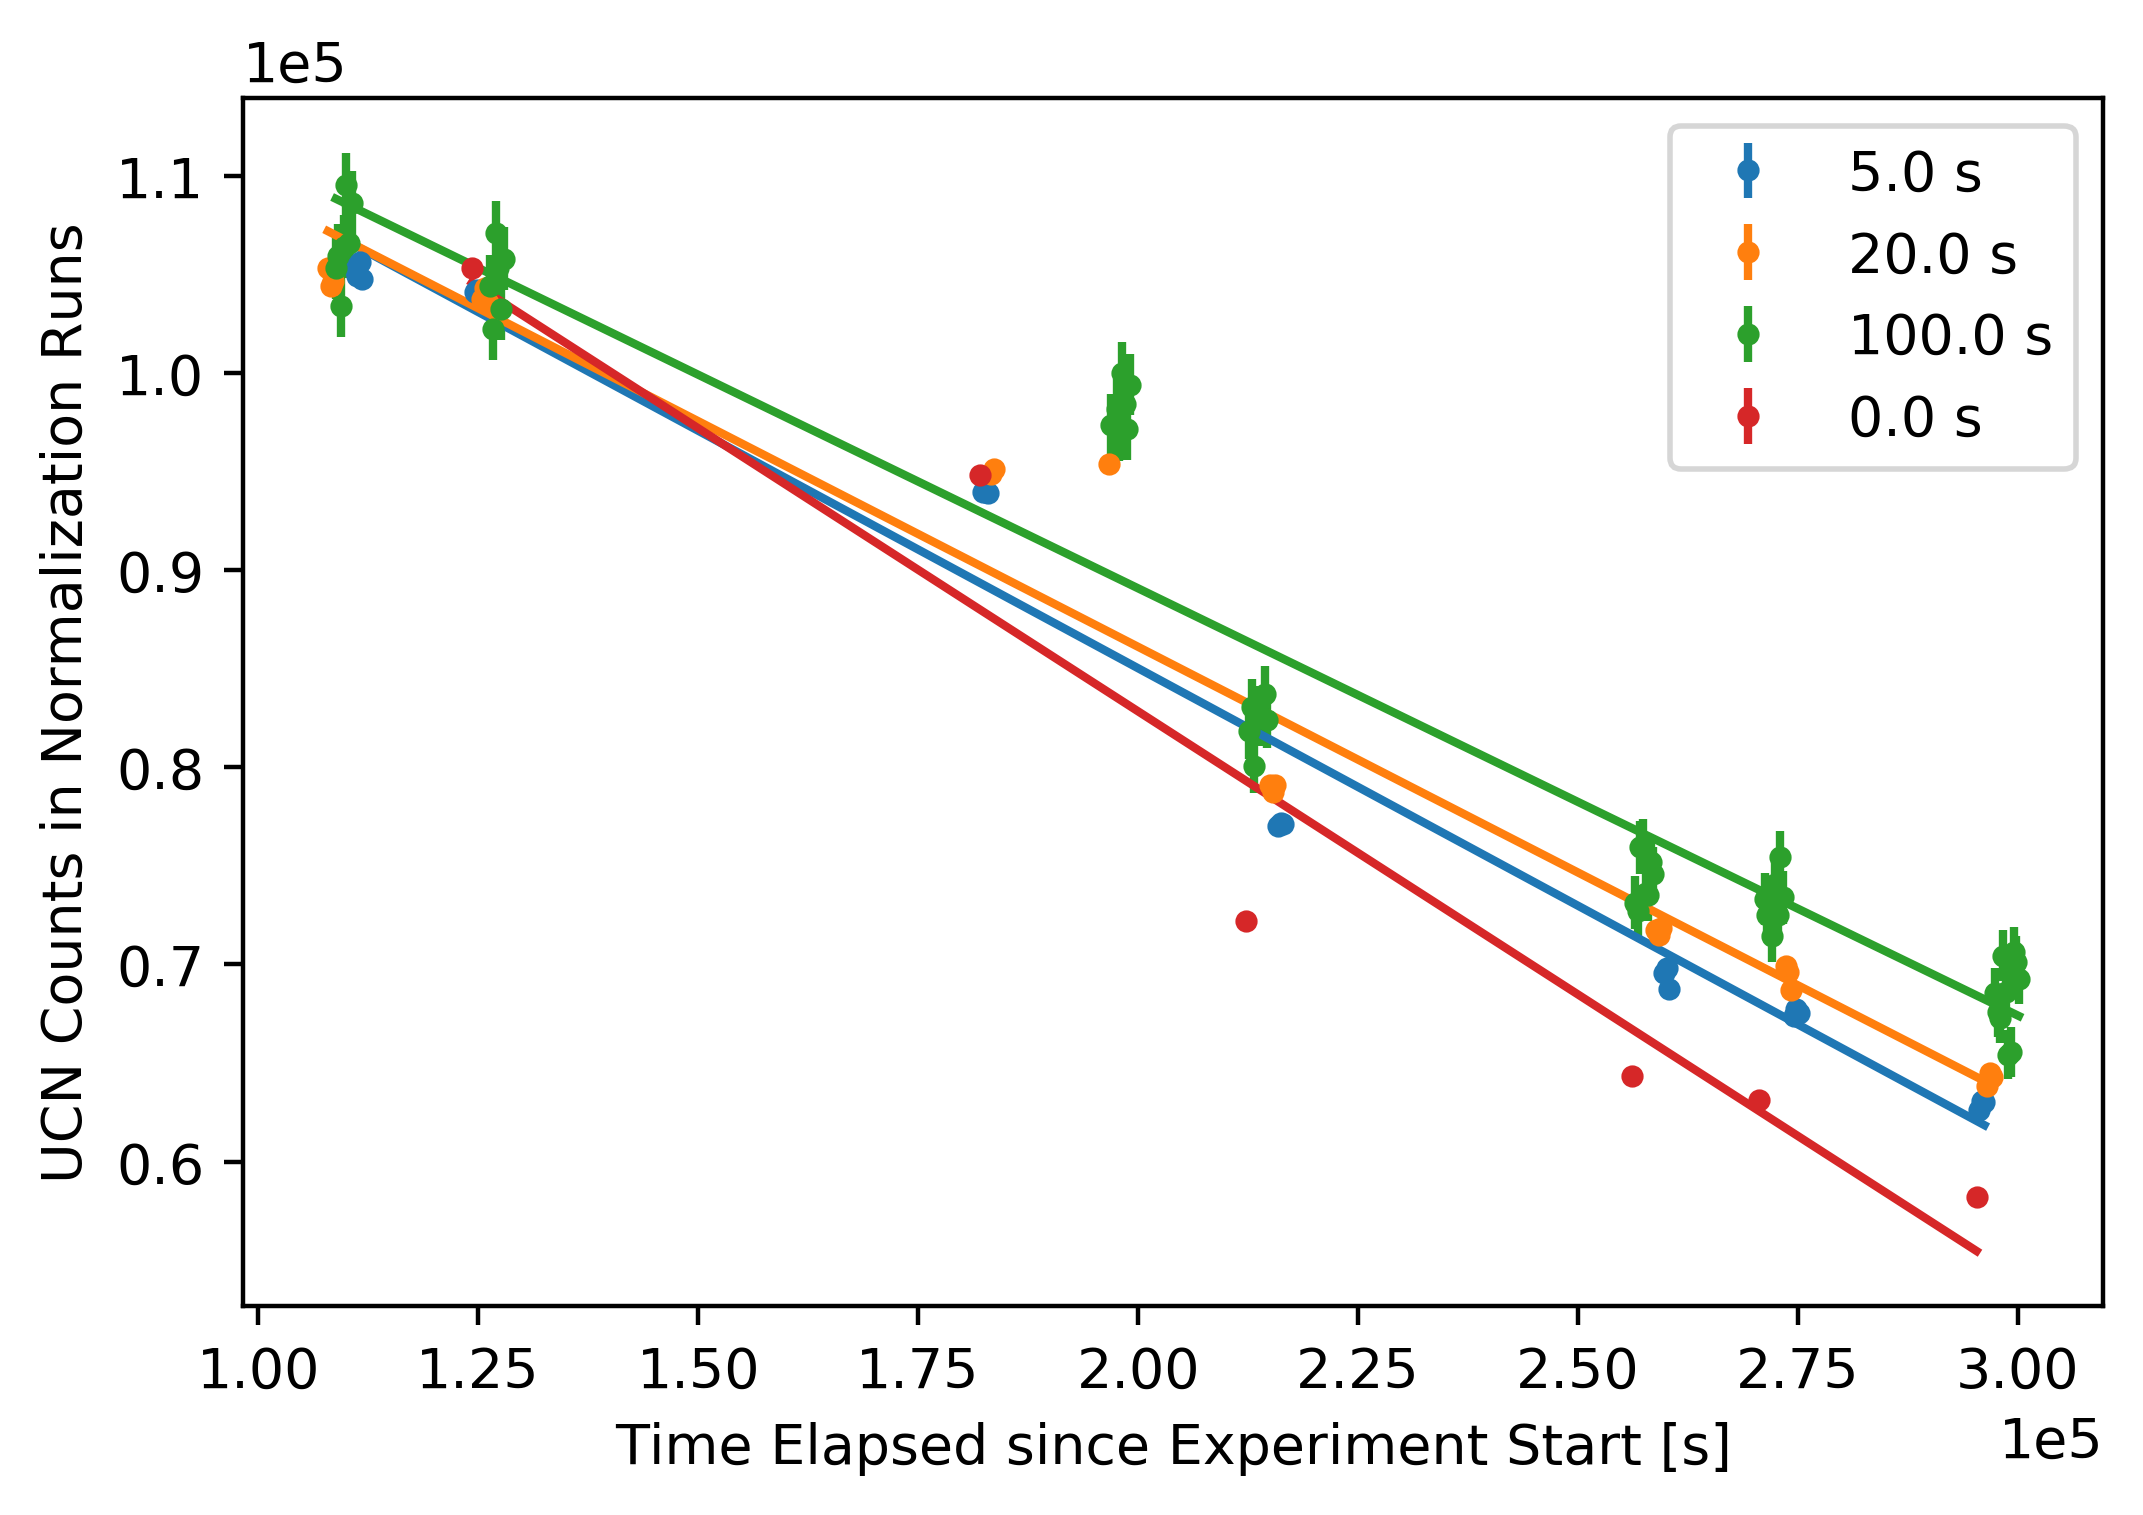

In [7]:
# config = "NORM"

# data_5    = load_data_2(config, 's005', normalize_flag = False)
# data_20   = load_data_2(config, 's020', normalize_flag = False)
# data_100  = load_data_2(config, 's100', normalize_flag = False)
# data_shot = load_data_2(config, 'shot', normalize_flag = False)
# data_list = [data_5, data_20, data_100, data_shot]

# # A normalization for absolute counts
# for arr in data_list:
#     norm_factor = (data_list[0][0,2] / arr[0,2])
#     arr[:,2] = arr[:,2] * norm_factor
#     arr[:,3] = arr[:,3] * norm_factor

# print('Fit parameters will be printed in 5, 20, 100, shot order\n')

# ax = plt.gca()
# for arr in data_list:
#     color = next(ax._get_lines.prop_cycler)['color']
#     plt.errorbar(arr[:,0], arr[:,2], yerr = arr[:,3], fmt = '.', label = '{} s'.format(arr[0,1]), color = color)
#     popt, pcov = curve_fit(source_fit, arr[:,0], arr[:,2], p0=[77600, -9], sigma = arr[:,3], absolute_sigma = True)
#     plt.plot(arr[:,0], source_fit(arr[:,0], *popt), color = color);

#     # printing the fit parameters and their errors:
#     fit_parameters = np.zeros(np.shape(pcov))
#     for i in range(0, np.size(popt)):
#         fit_parameters[i,0] = popt[i]
#         fit_parameters[i,1] = np.sqrt(np.diag(pcov))[i]
#     print("Fit parameters:\n N_0 = {} +/- {},\n A: {} +/- {}".format(
#             fit_parameters[0,0],
#             fit_parameters[0,1],
#             fit_parameters[1,0],
#             fit_parameters[1,1]))
    
# plt.legend()
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.xlabel('Time Elapsed since Experiment Start [s]')
# plt.ylabel('UCN Counts in Normalization Runs');
# # plt.yscale('log')

Bernhard's reflections on the normalization plot shown above:

> concerning your plot, this is interesting as I would have expected the opposite <br/>
we know and have several times measured,, that the build up of the frost on the<br/>
surface<br/>
see Anghel et al   Eur. Phys. J. A (2018) 54: 148<br/>
acts as energy filter - i.e. the longer the source is operated the intensity decreases and<br/>
the intensity decreases stronger for lower energy UCNs<br/>
therefore the longer storage times should be more strongly suppresed<br/>
 see Fig. 7 and 8 in the paper .<br/><br/>
In this paper you can also find, that it is not a decay of UCN production we observe but<br/>
an increase in losses due to buildup of frost on the surface- have a look.<br/><br/>
So my first thought would be, that there might be some effect in your analysis,<br/>
with is not yet considered or missing or unknown, which makes this change.<br/>
Might have to do something with monitoring, but I don;t know right away.<br/>
But one should certainly look at that closer.

The key figure from this paper that should cause some revisitation of the normalization analysis:

![](../misc/frost_paper_fig.png)
![](jonahberean/psi_transmission/misc/frost_paper_fig.png)

And from the paper:

>The West-1 beamport is located about 1.13 m and<br/>
the West-2 beamport 3.23 m above the sD 2 surface. This<br/>
results in a relative shift of the UCN energy spectra at the<br/>
two beamports. UCN which can reach the higher beam-<br/>
port have a minimum energy of 320 neV outside the sD 2<br/>
surface, while UCN at West-1 have a minimum energy of<br/>
113 neV, similar to the kinetic energy boost by the sD 2<br/>
potential [45,46].

So clearly we're getting this backwards, and the results need to be revisited.

The normalization I'm performing here just calculated the ratio:

$$R = \frac{\text{total counts in the first direct shot run}}{\text{total counts in the first run of storage time }t_s}$$

Then every run is normalized by the $R$ factor. If performed iteratively, the direct shot measurements are just multiplied by a factor of 1. I've also tried to normalize to the other run types instead, for example the 100 second runs. This yielded the same, problematic, trend.

Fit parameters will be printed in 5, 20, 100, shot order

Fit parameters:
 N_0 = 5527.418643969398 +/- 8.54559506812636,
 A: -0.009997321562526027 +/- 3.739374601415421e-05
Fit parameters:
 N_0 = 5488.029414951057 +/- 12.535122909117765,
 A: -0.009526119720511985 +/- 5.42163084078771e-05
Fit parameters:
 N_0 = 5466.394384902607 +/- 29.78056981356517,
 A: -0.00894578488227862 +/- 0.0001251561867271066
Fit parameters:
 N_0 = 5754.747951110785 +/- 3.6742093697825076,
 A: -0.01178315545208086 +/- 1.5230841889076065e-05


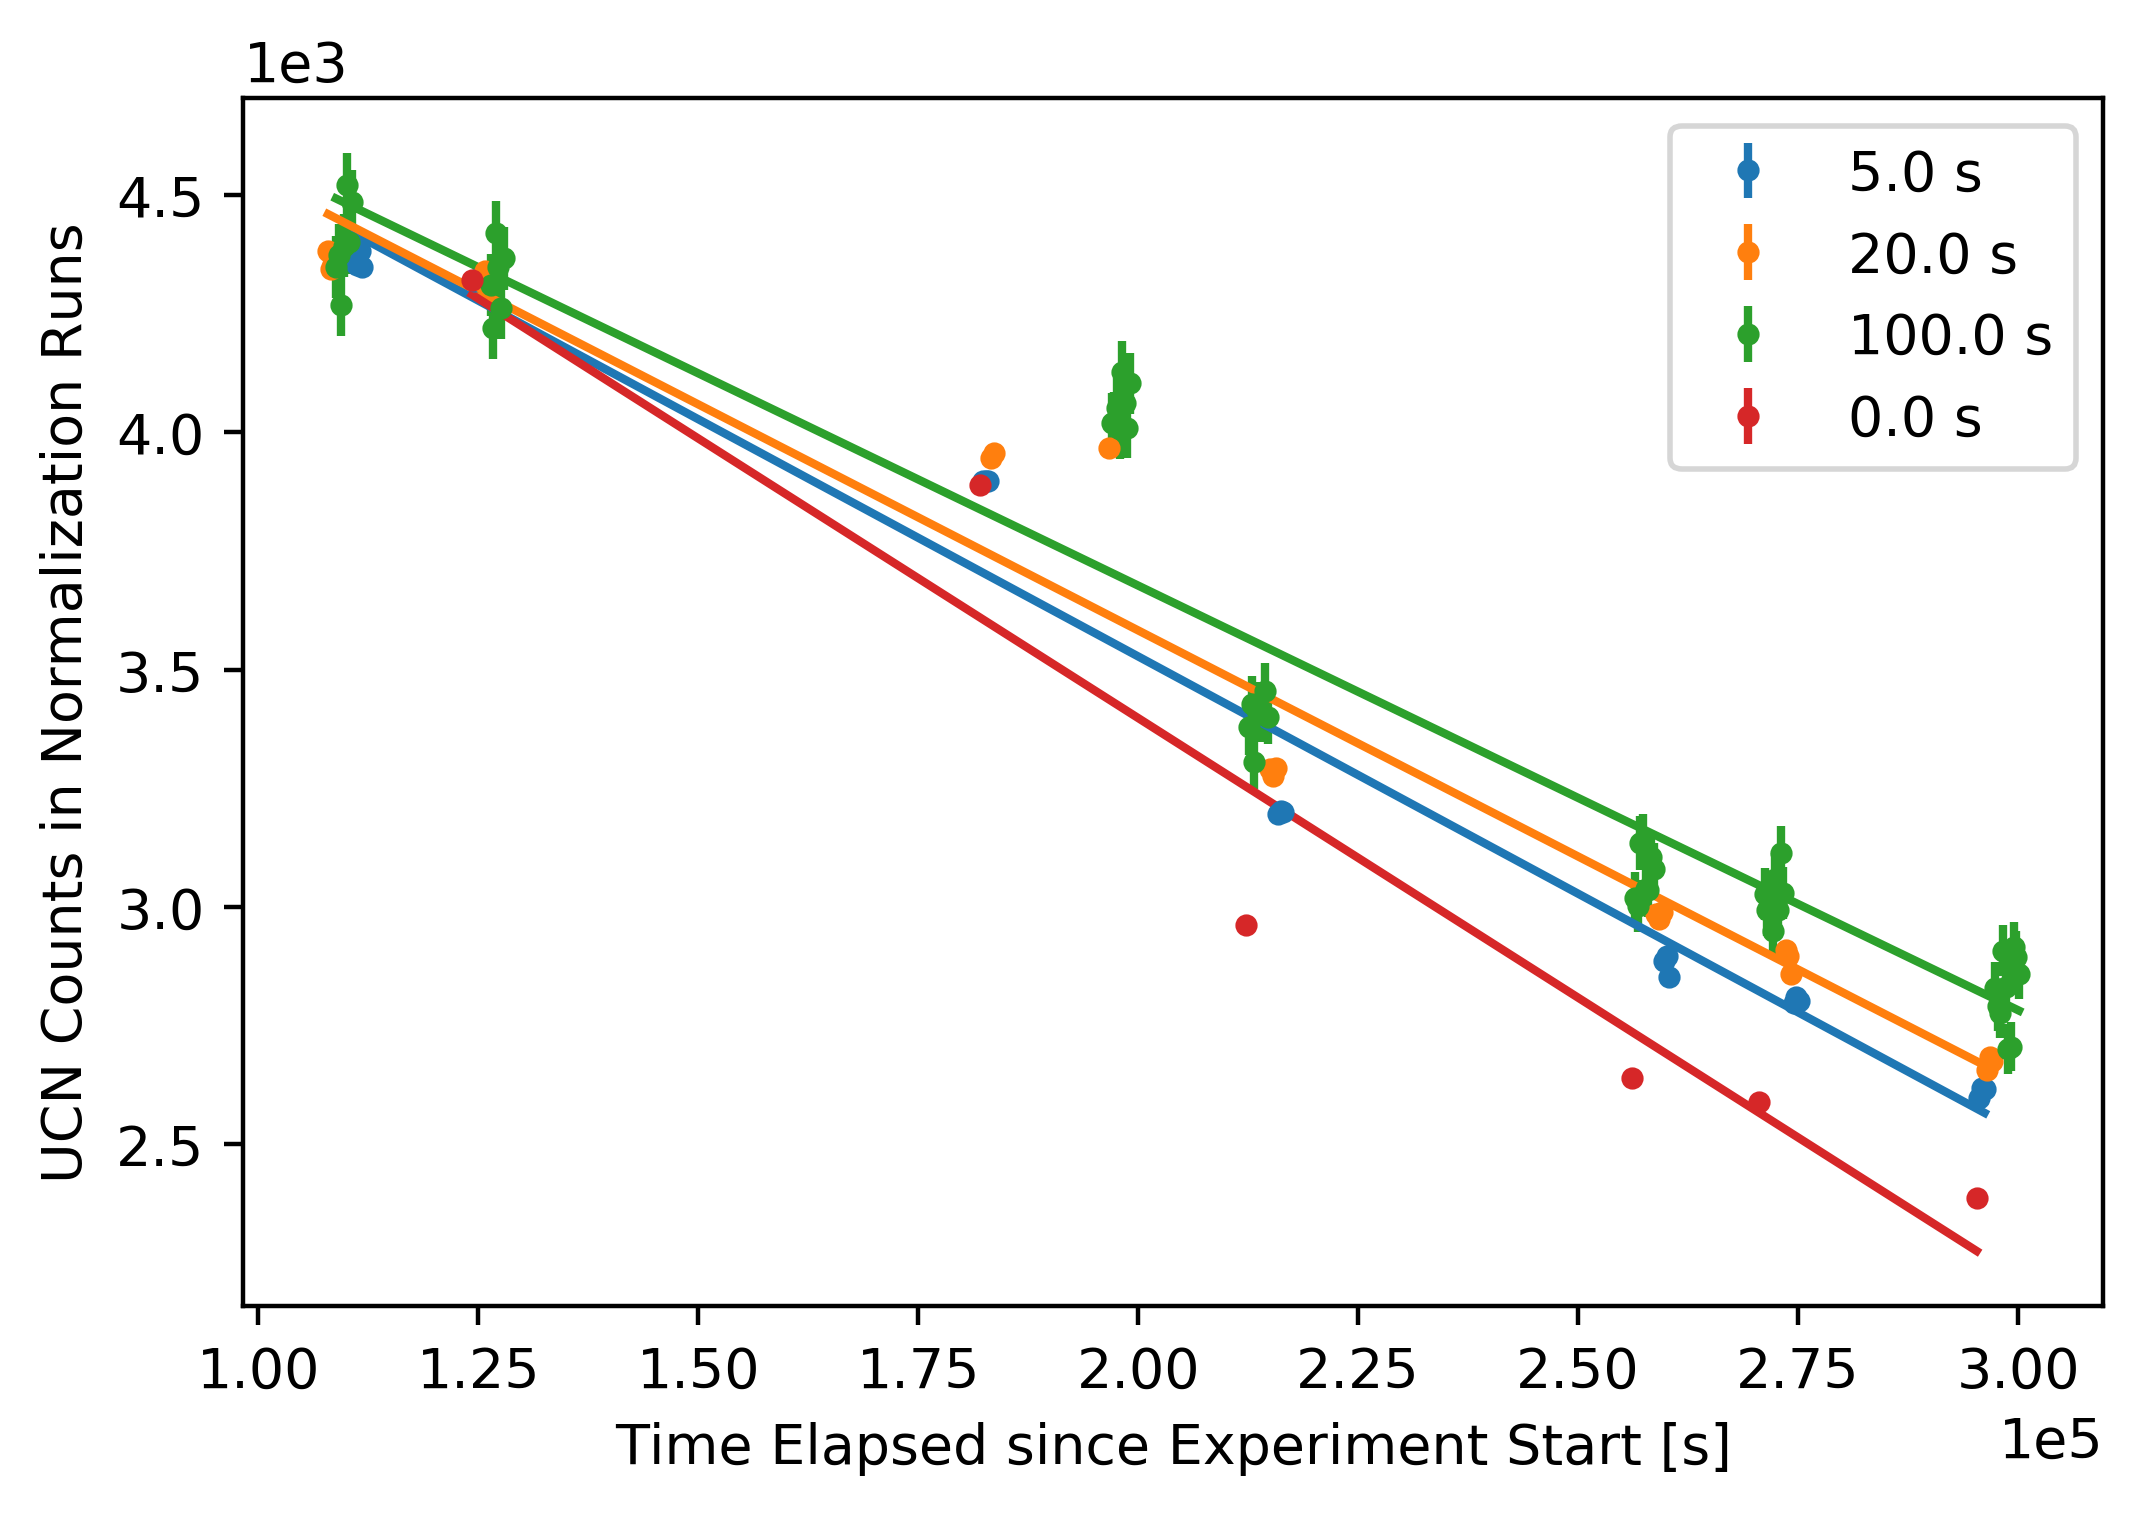

In [49]:
config = "NORM"

data_5    = load_data_2(config, 's005', normalize_flag = False)
data_20   = load_data_2(config, 's020', normalize_flag = False)
data_100  = load_data_2(config, 's100', normalize_flag = False)
data_shot = load_data_2(config, 'shot', normalize_flag = False)
data_list = [data_5, data_20, data_100, data_shot]

# # A normalization for absolute counts

# # 5 second
# norm_factor = (data_list[3][0,2] / np.average(data_list[0][4:7,2]))
# # Multiplying every run's counts by the normalization factor.
# data_list[0][:,2] = data_list[0][:,2] * norm_factor
# data_list[0][:,3] = data_list[0][:,3] * norm_factor

# # 20 second
# norm_factor = (data_list[3][0,2] / np.average(data_list[1][3:6,2]))
# # Multiplying every run's counts by the normalization factor.
# data_list[1][:,2] = data_list[1][:,2] * norm_factor
# data_list[1][:,3] = data_list[1][:,3] * norm_factor

# # 100 second
# norm_factor = (data_list[3][0,2] / np.average(data_list[2][7:13,2]))
# # Multiplying every run's counts by the normalization factor.
# data_list[2][:,2] = data_list[2][:,2] * norm_factor
# data_list[2][:,3] = data_list[2][:,3] * norm_factor

# What if instead we normalized the other way, to the counts on the 100 second runs:

# 5 second
norm_factor = (np.average(data_list[2][7:13,2]) / np.average(data_list[0][4:7,2]))
# Multiplying every run's counts by the normalization factor.
data_list[0][:,2] = data_list[0][:,2] * norm_factor
data_list[0][:,3] = data_list[0][:,3] * norm_factor

# 20 second
norm_factor = (np.average(data_list[2][7:13,2]) / np.average(data_list[1][3:6,2]))
# Multiplying every run's counts by the normalization factor.
data_list[1][:,2] = data_list[1][:,2] * norm_factor
data_list[1][:,3] = data_list[1][:,3] * norm_factor

# 0 second
norm_factor = (np.average(data_list[2][7:13,2]) / data_list[3][0,2])
# Multiplying every run's counts by the normalization factor.
data_list[3][:,2] = data_list[3][:,2] * norm_factor
data_list[3][:,3] = data_list[3][:,3] * norm_factor


print('Fit parameters will be printed in 5, 20, 100, shot order\n')

ax = plt.gca()
for arr in data_list:
    color = next(ax._get_lines.prop_cycler)['color']
    plt.errorbar(arr[:,0], arr[:,2], yerr = arr[:,3], fmt = '.', label = '{} s'.format(arr[0,1]), color = color)
    popt, pcov = curve_fit(source_fit, arr[:,0], arr[:,2], p0=[77600, -9], sigma = arr[:,3], absolute_sigma = True)
    plt.plot(arr[:,0], source_fit(arr[:,0], *popt), color = color);

    # printing the fit parameters and their errors:
    fit_parameters = np.zeros(np.shape(pcov))
    for i in range(0, np.size(popt)):
        fit_parameters[i,0] = popt[i]
        fit_parameters[i,1] = np.sqrt(np.diag(pcov))[i]
    print("Fit parameters:\n N_0 = {} +/- {},\n A: {} +/- {}".format(
            fit_parameters[0,0],
            fit_parameters[0,1],
            fit_parameters[1,0],
            fit_parameters[1,1]))
    
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time Elapsed since Experiment Start [s]')
plt.ylabel('UCN Counts in Normalization Runs');
# plt.yscale('log')

A more rigorous approach to a count-based-normalization of these curves would be to use interpolated counts from the four fits performed. For any given run, it will be multiplied by the normalization factor:

$$R' = $$

# Clarifying the Monitor Detector Sequence

Schematic of PSI source and beamlines:

![](../misc/psi_source.png)
![](jonahberean/psi_transmission/misc/psi_source.png)

The monitor detector was positioned on West-2 at the opening to the UCN storage vessel

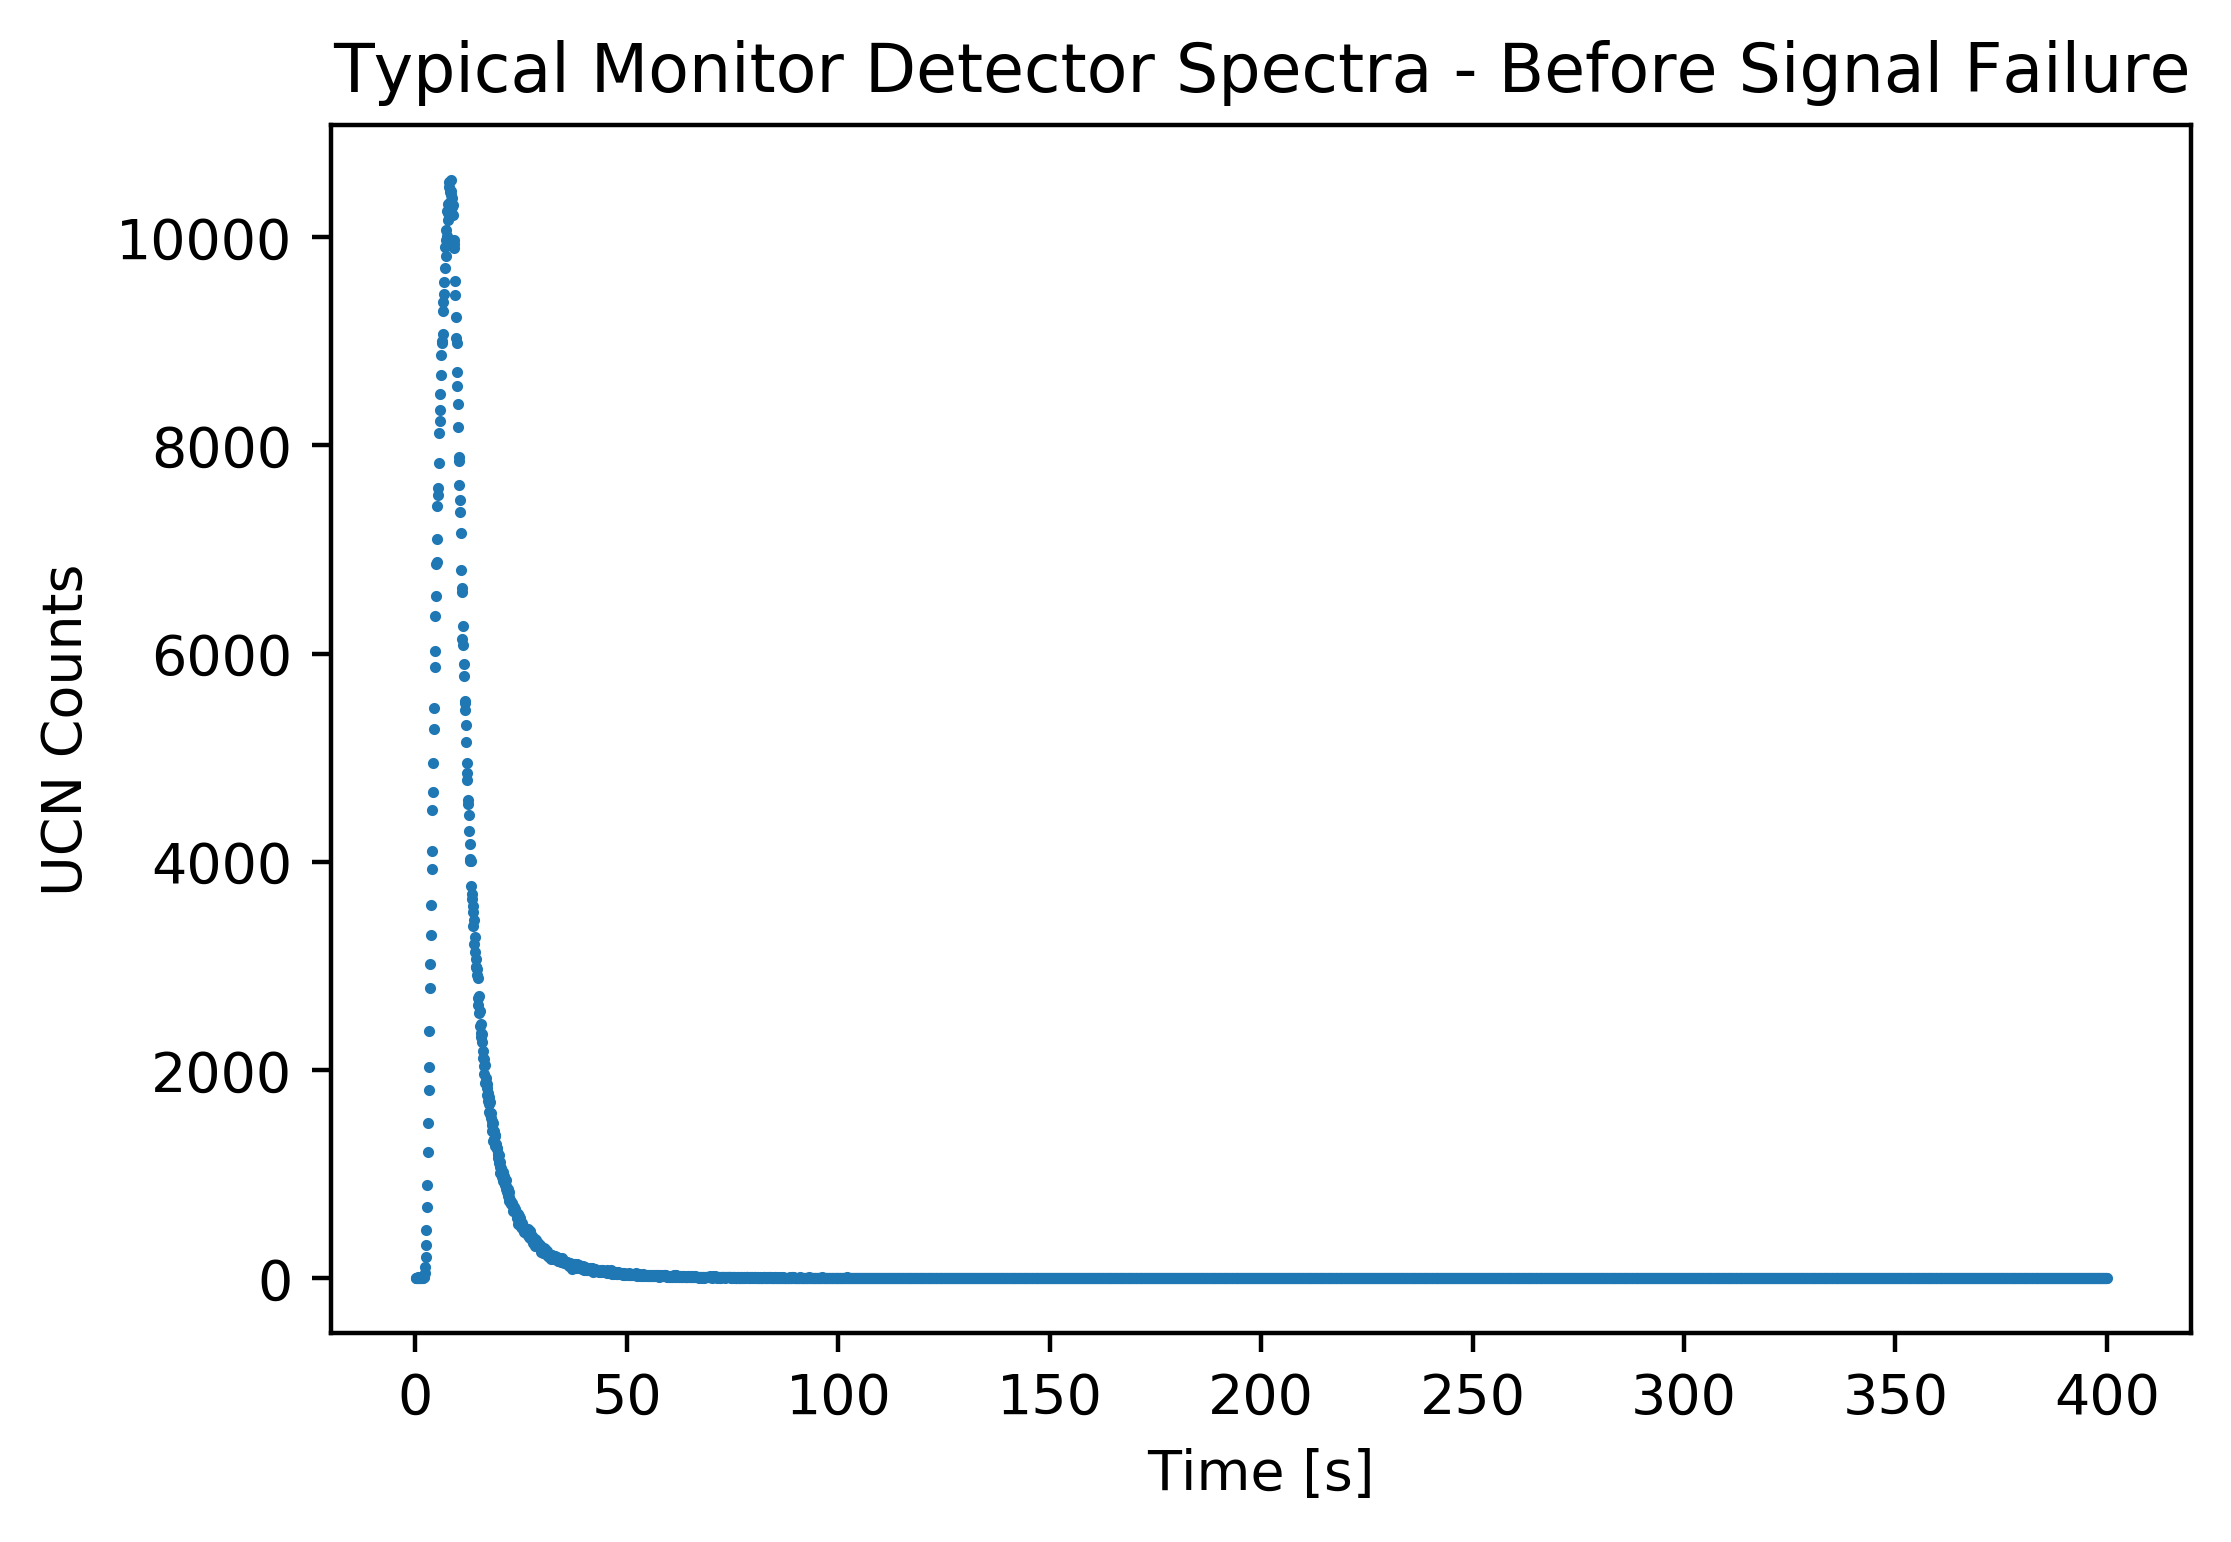

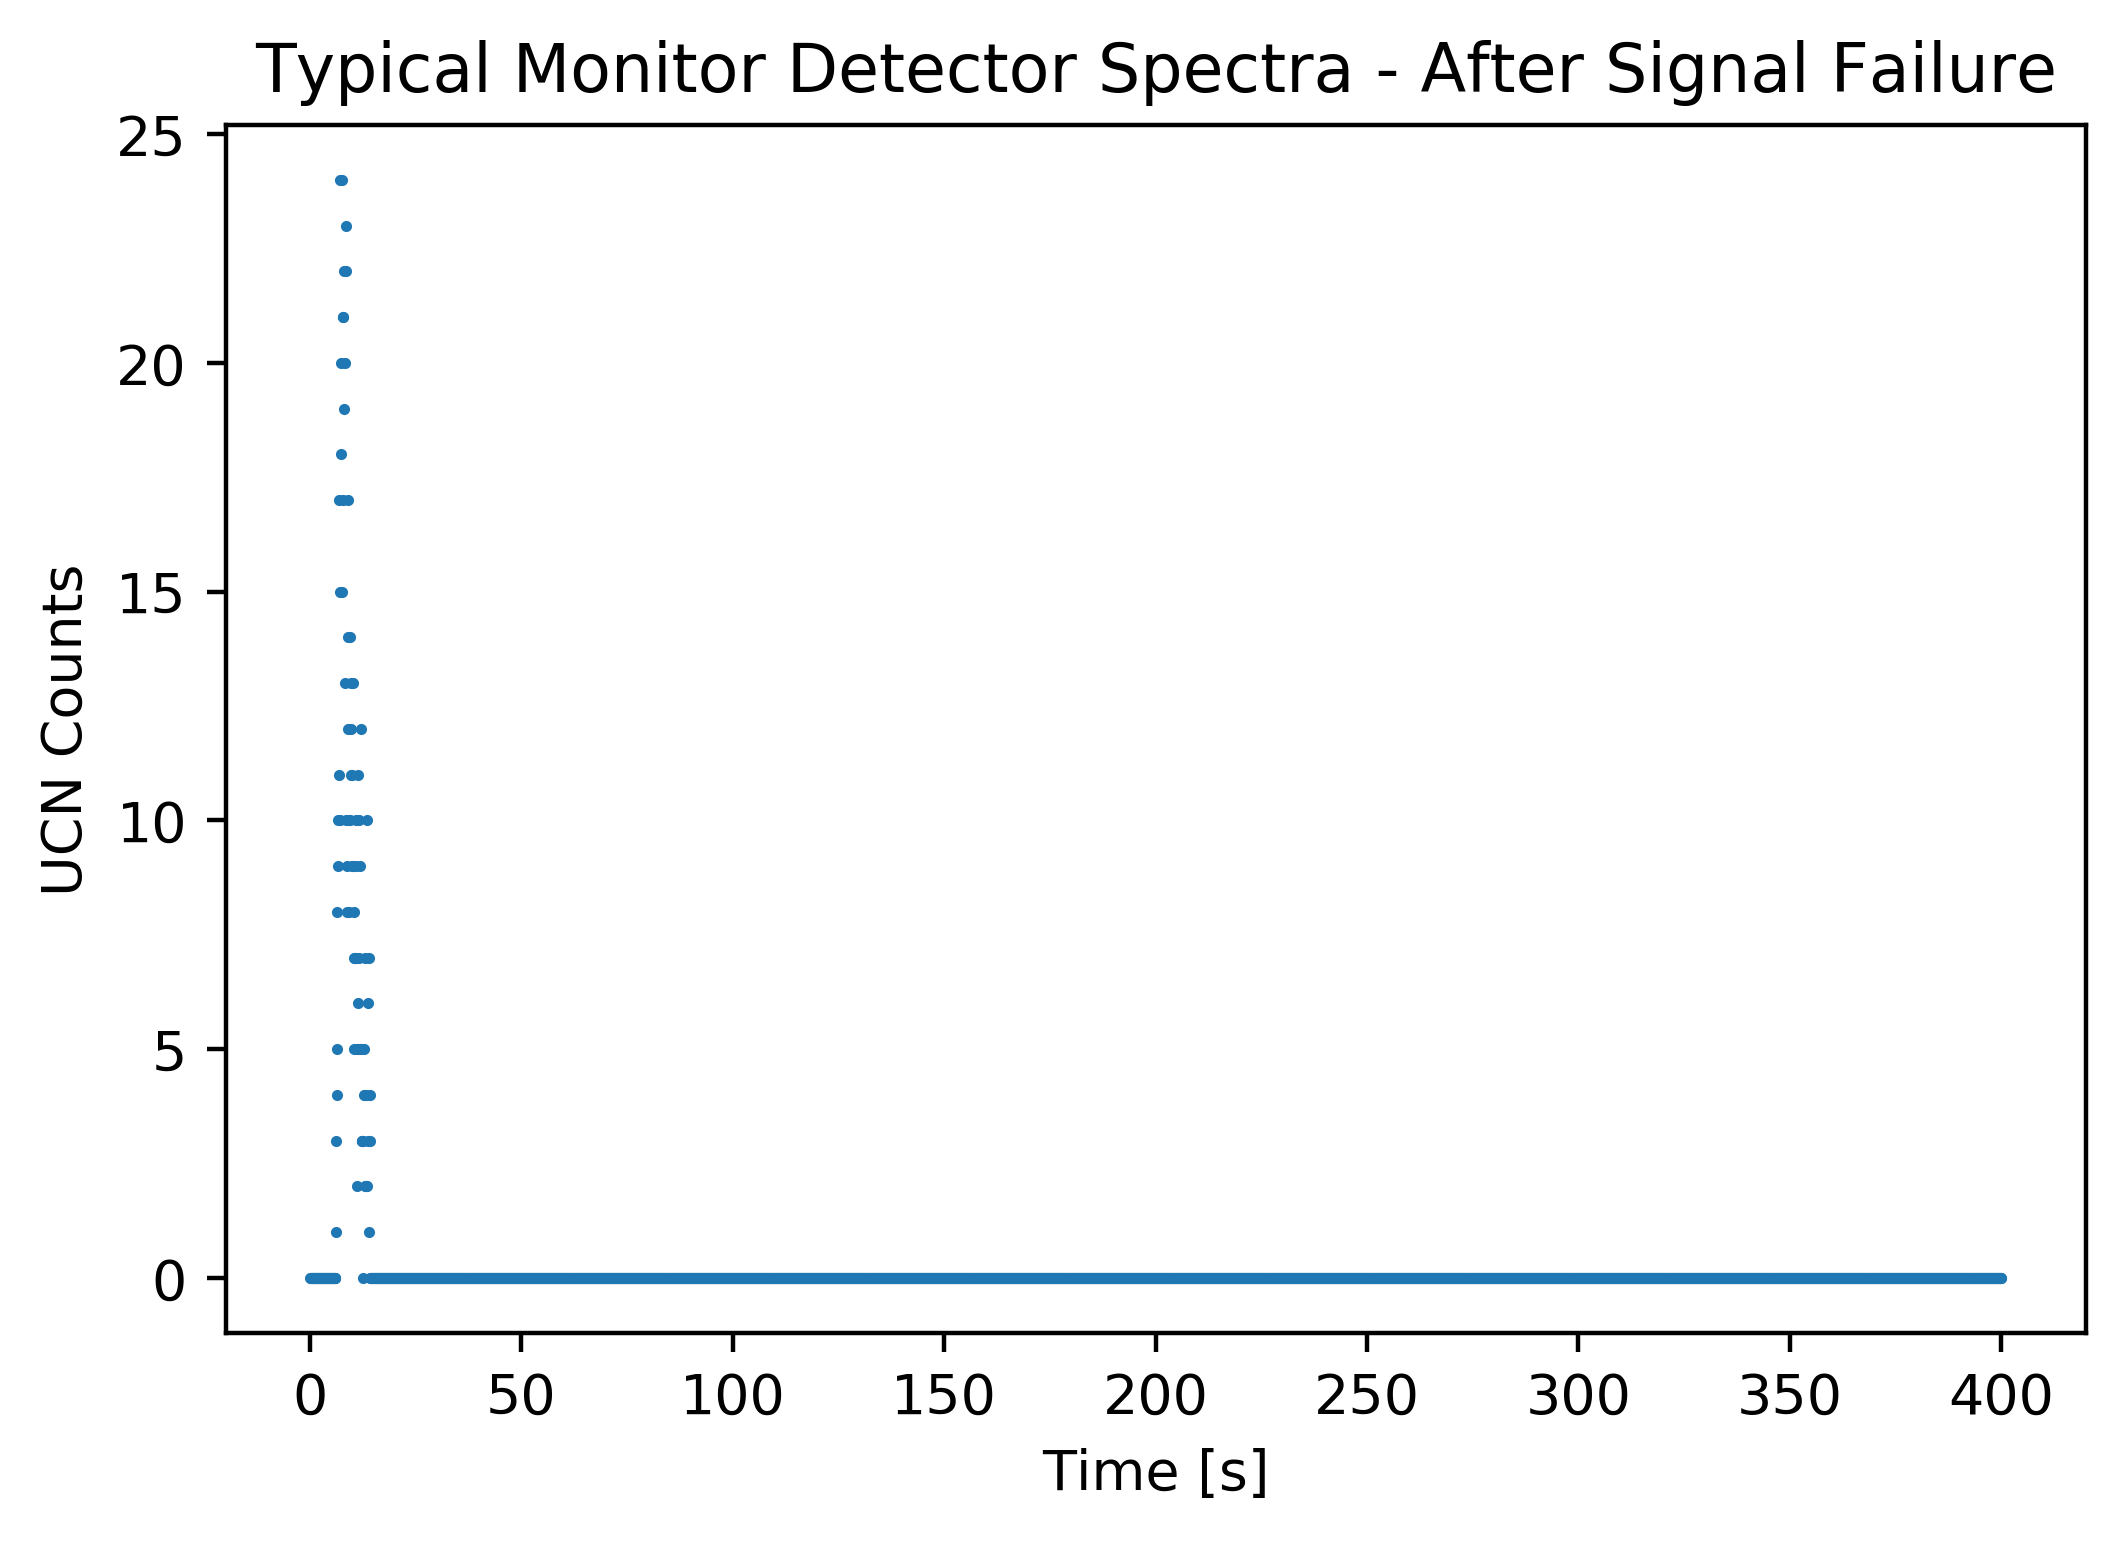

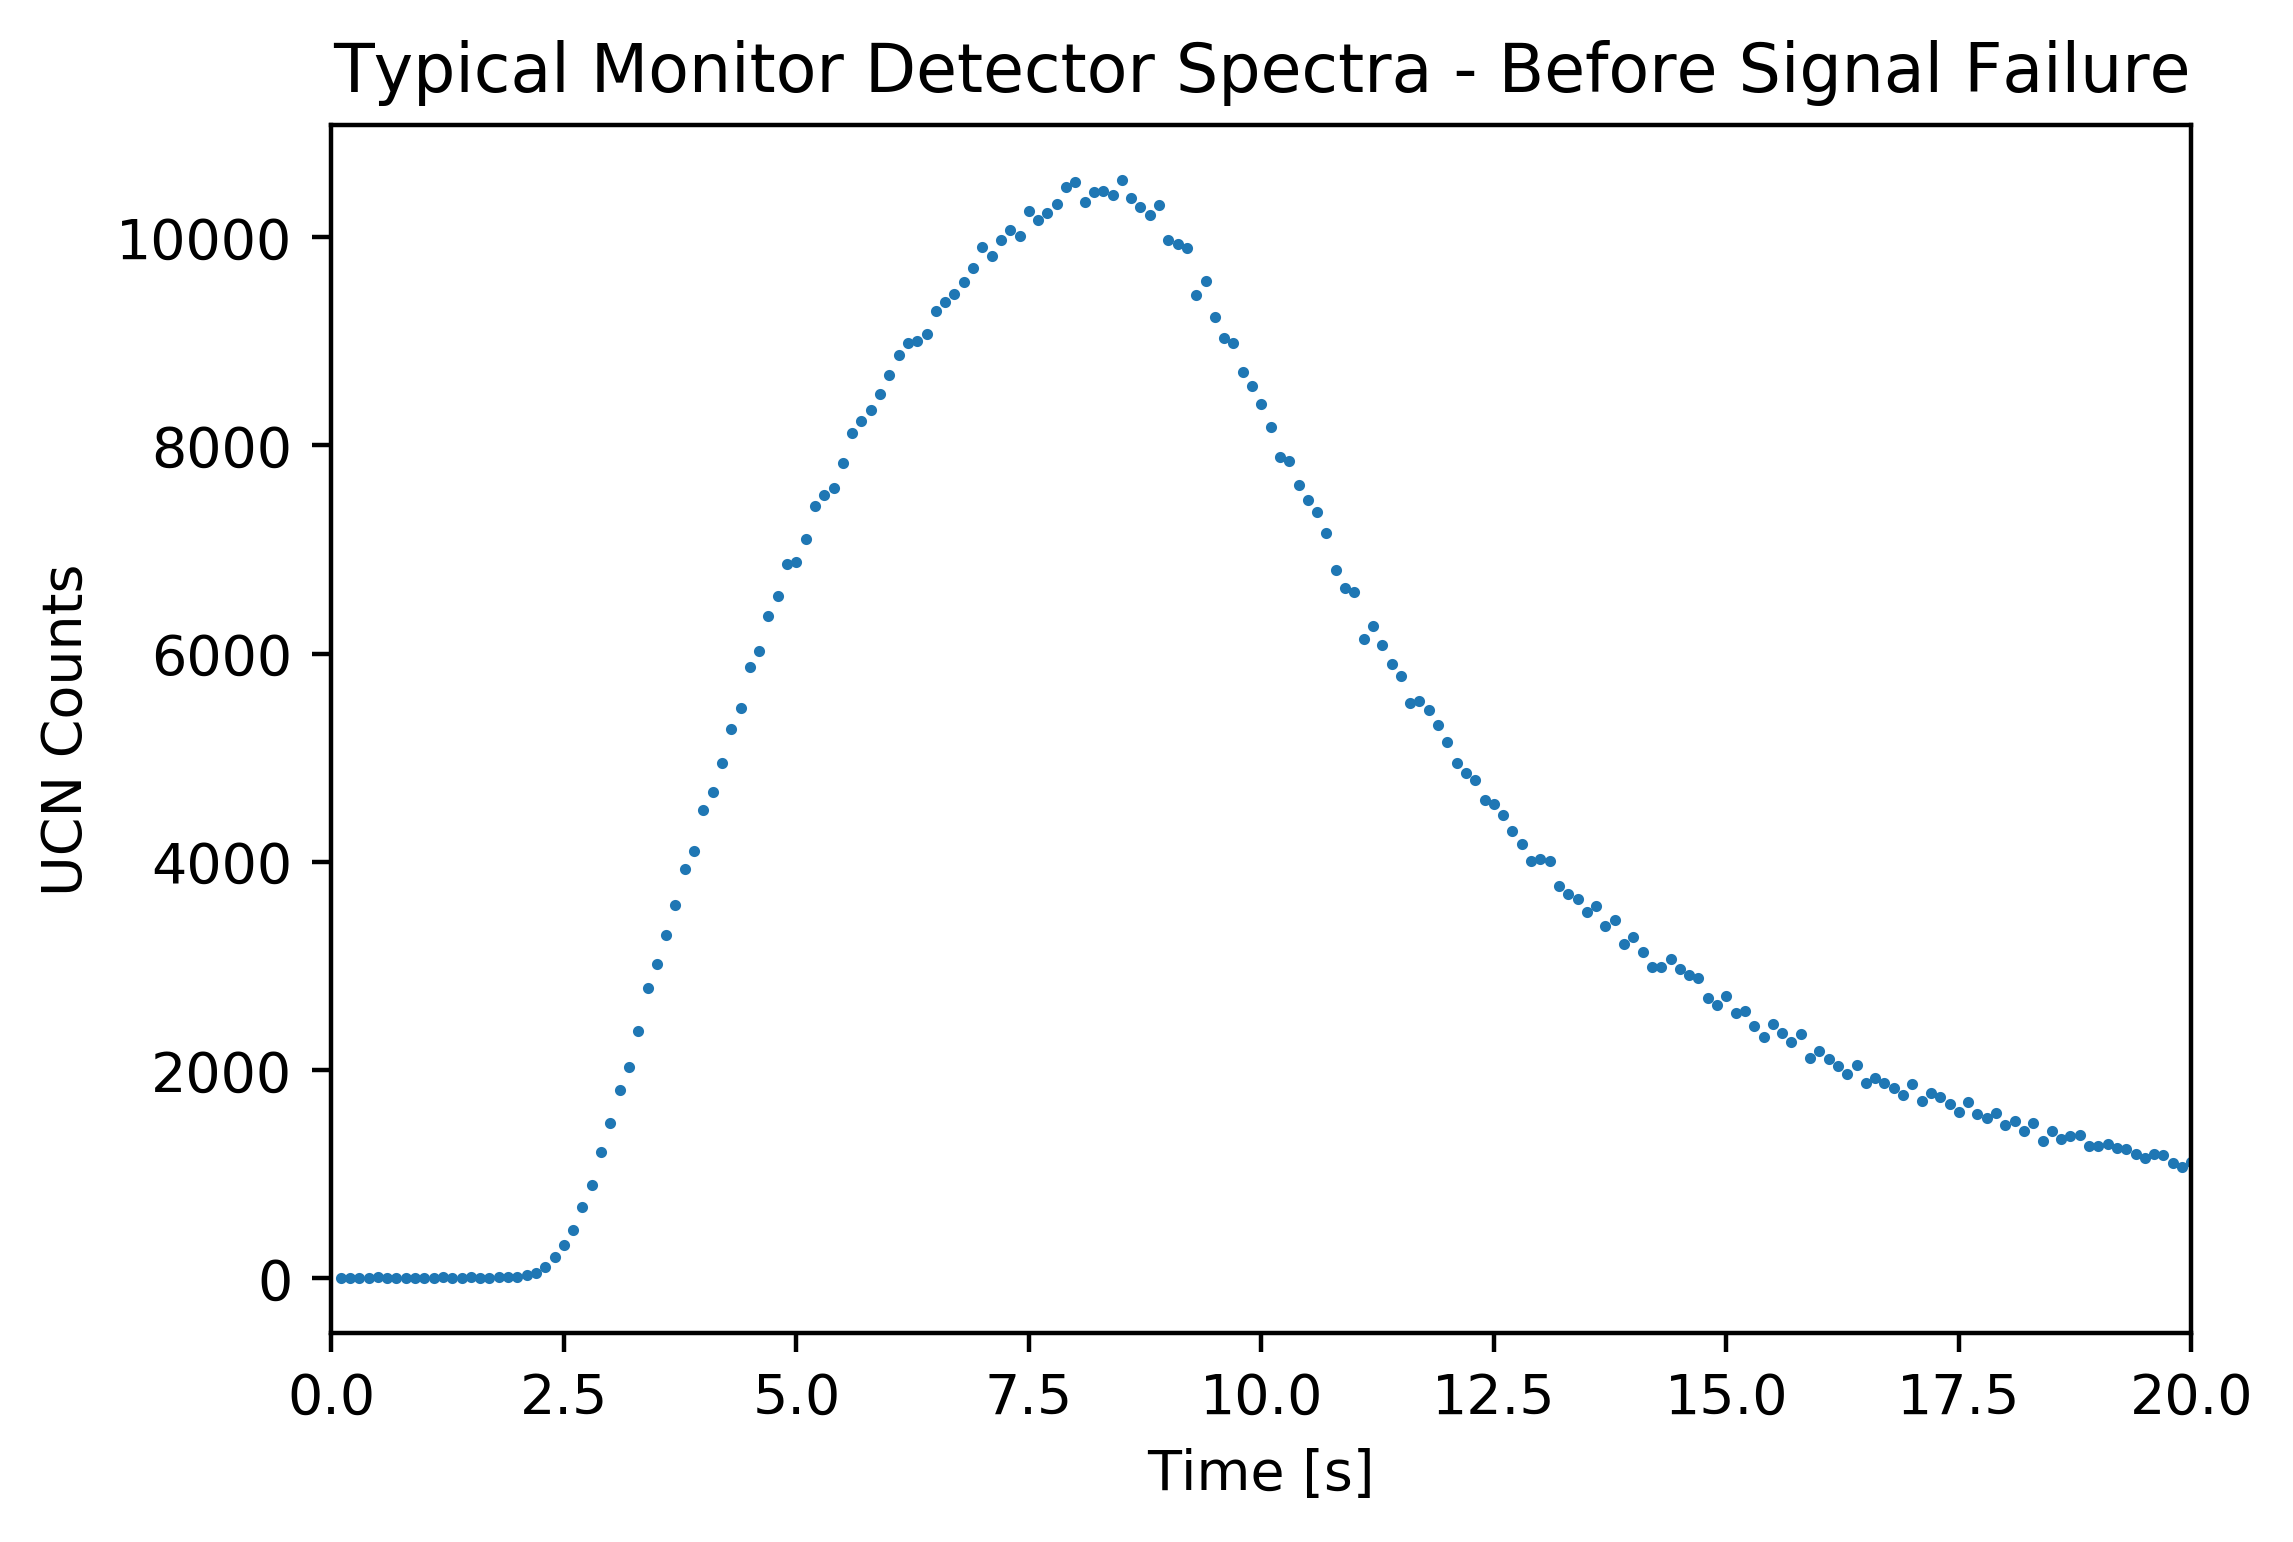

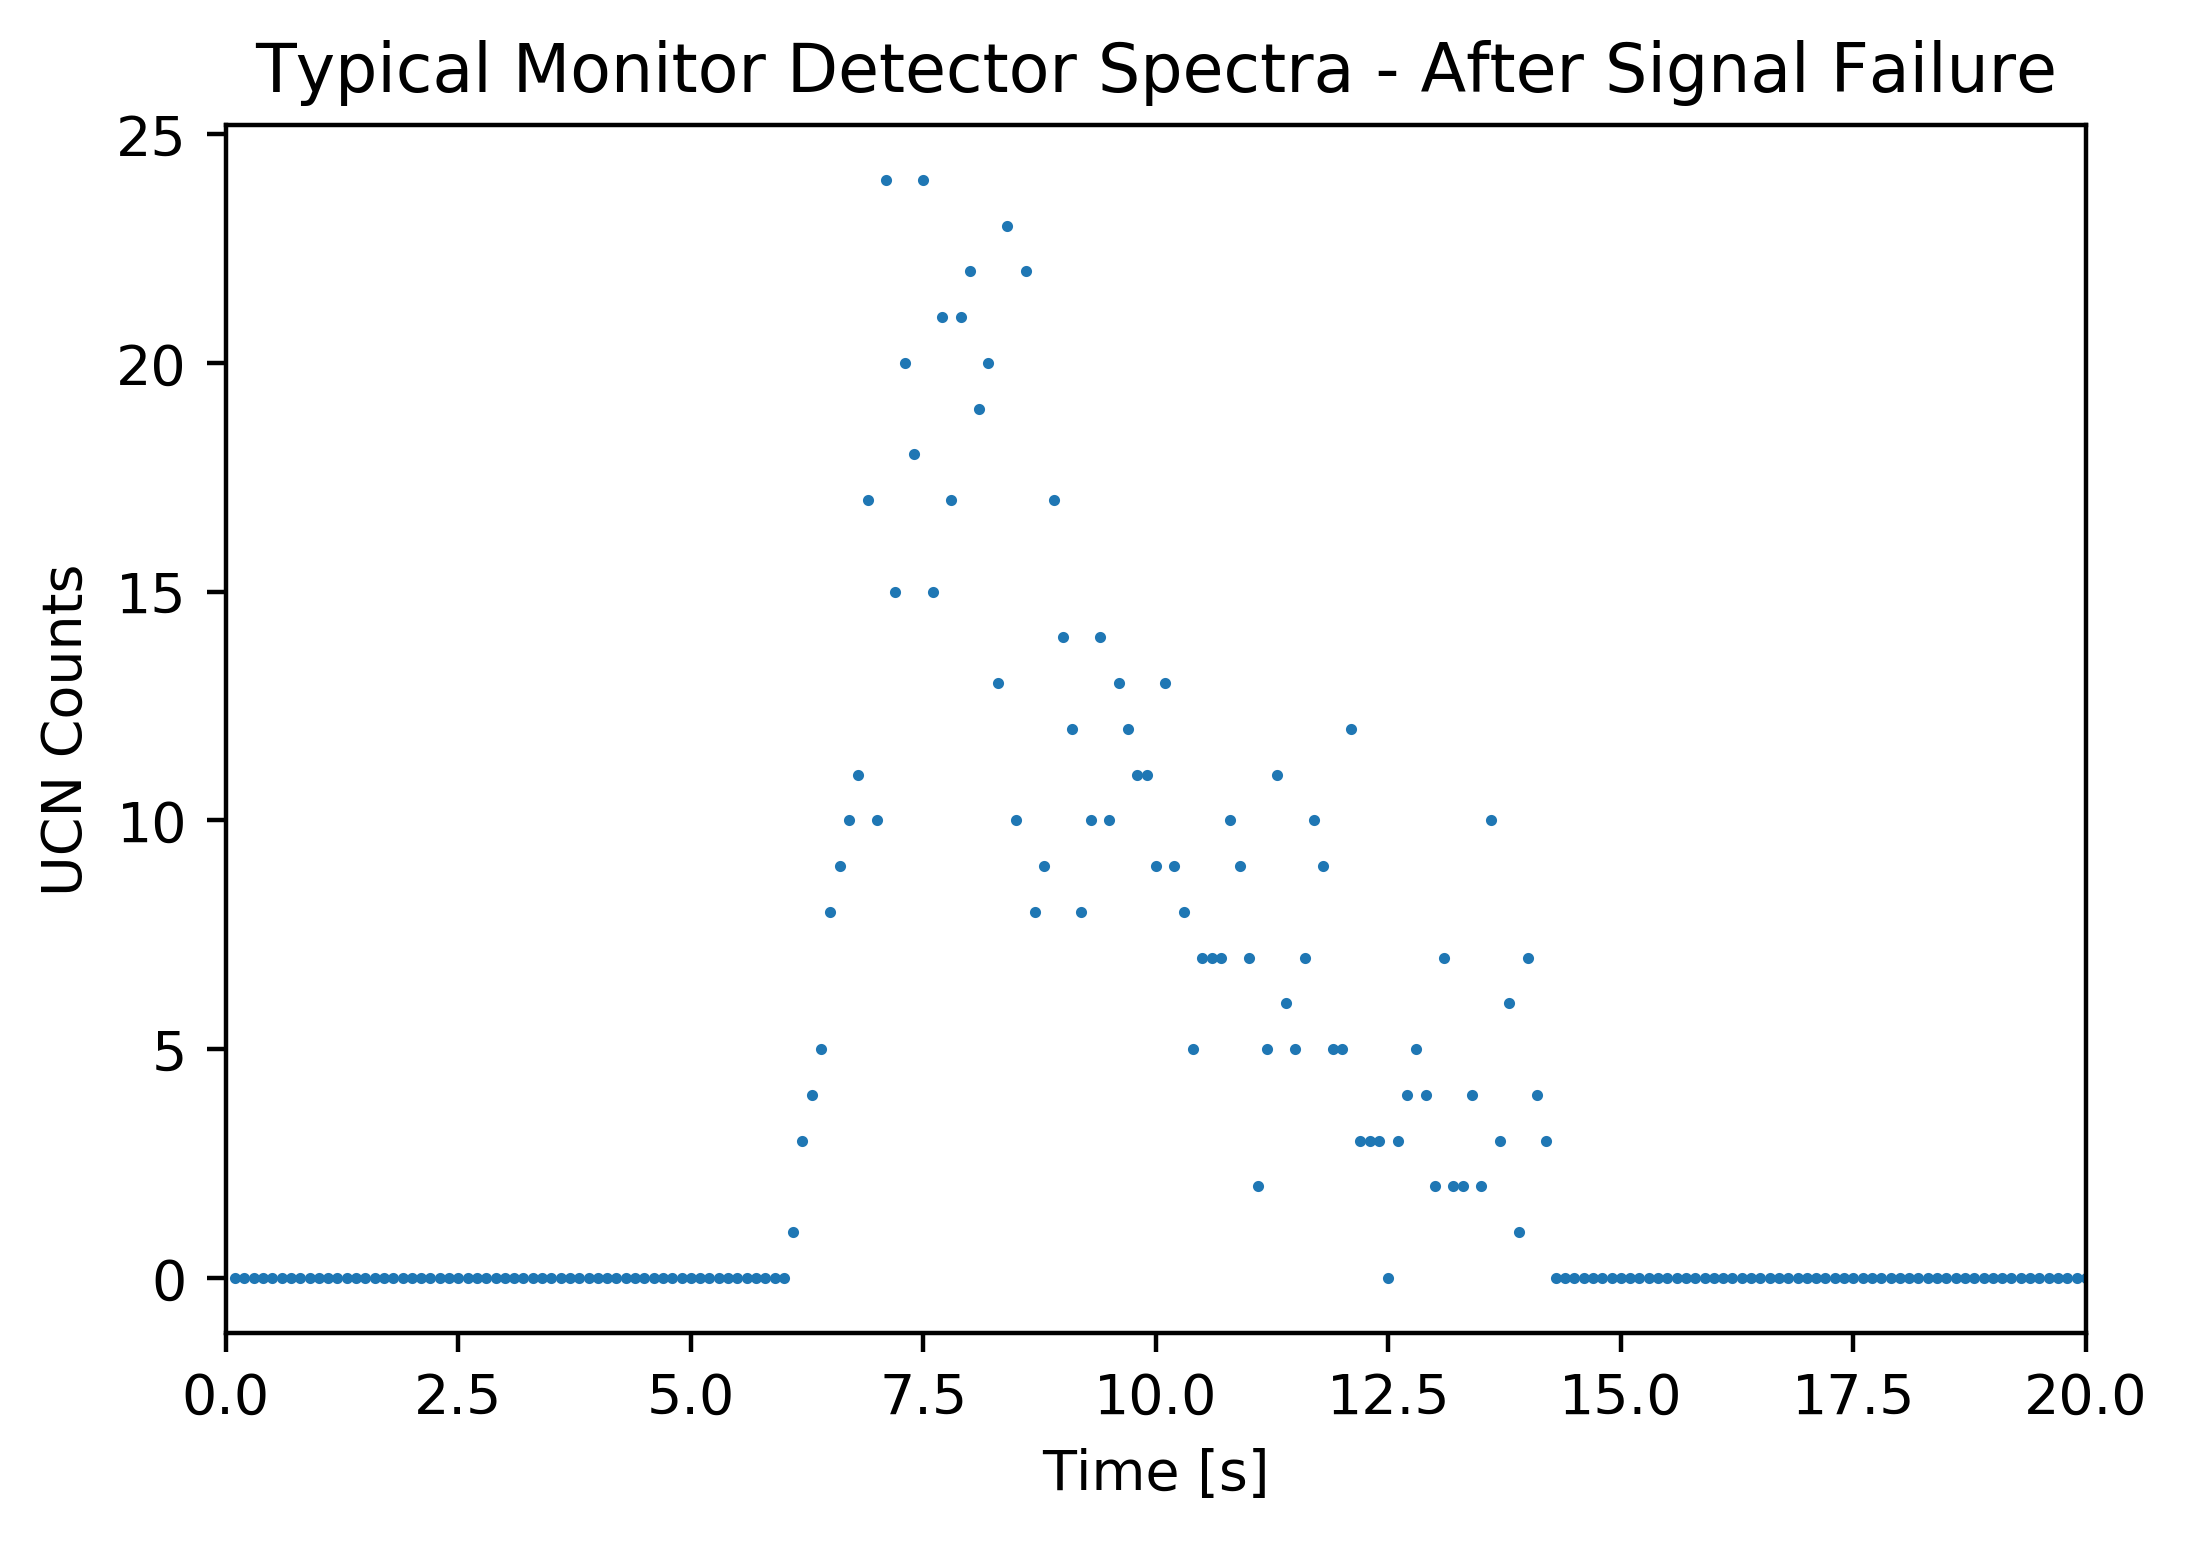

In [18]:
data = np.loadtxt("../data_monitor/12/T081217_0076.tof", usecols = (0,1));
plt.scatter(data[:,0] * 0.1, data[:,1], s=1);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');
plt.title('Typical Monitor Detector Spectra - Before Signal Failure')
plt.show()

plt.clf()
data = np.loadtxt("../data_monitor/12/T091217_0198.tof", usecols = (0,1));
plt.scatter(data[:,0] * 0.1, data[:,1], s=1);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');
plt.title('Typical Monitor Detector Spectra - After Signal Failure')
plt.show()

plt.clf()
data = np.loadtxt("../data_monitor/12/T081217_0076.tof", usecols = (0,1));
plt.scatter(data[:,0] * 0.1, data[:,1], s=1);
plt.xlabel('Time [s]');
plt.xlim([0,20]);
plt.title('Typical Monitor Detector Spectra - Before Signal Failure')
plt.ylabel('UCN Counts');
plt.show()

plt.clf()
data = np.loadtxt("../data_monitor/12/T091217_0198.tof", usecols = (0,1));
plt.scatter(data[:,0] * 0.1, data[:,1], s=1);
plt.xlabel('Time [s]');
plt.xlim([0,20]);
plt.title('Typical Monitor Detector Spectra - After Signal Failure')
plt.ylabel('UCN Counts');

Bernhard's interpretation:

>The UCN Detector is started with actually a signal about 8 s before the proton beam kick<br/>
And it needs a second signal to be stopped and restart the file.<br/>
Every other time one of these two signals fails and the detector is out of sync with the<br/>
proton beam. Therefore you do not see the standard UCN delivery over<br/>
the 300 seconds period but just the UCN counts over the time of ~7 seconds<br/>
just before the proton kick, when ususally the file is restarted.<br/>
i.e. the last seconds to the right of the 'normal ' time plot.

This interpretation means that during this period we observe the background monitor detector counts during the period of time prior to irradiation. If this is true, then why do we see any counts at all? Conversely, when these two signals are in sync and working properly, the counts will decay to zero by the end of the run. Does this suggest that Edgard applied some background correction to the Monitor Detector data also? 

# Proton Beam Current Stability and Background Corrections

Below is the plot from Edgard's February slides of the proton beam current stability. In these slides Edgard also claims that background correction has been performed on the data. We've requested detail on these corrections, and the raw data to work with and hopefully reproduce the results. 

![](../misc/beam_current_edgard.png)
![](jonahberean/psi_transmission/misc/beam_current_edgard.png)

# Error Propagation and the Source Performance Normalization

# Transmission

The analysis of the source performance allowed for a normalization of every run's counts to effectively remove the linear source degradation effect. If we look at just the runs in the 'nominal' configuration (that is, the guide-less configuration), after the source performance normalization, we relatively see flat, unchanging count totals throughout the experimental campaign. This is as we would hope, indicating the degradation has been properly "normalized away".

Fit parameters:
 N_0 = 133207.5945824243 +/- 228.05867454065873,
 A: -2.231843332367589e-08 +/- 0.0009986688573663568
Fit parameters:
 N_0 = 69776.486943231 +/- 186.24178654083605,
 A: 5.3179459058583234e-08 +/- 0.0008405562805048948
Fit parameters:
 N_0 = 5466.390409581145 +/- 34.66447715298638,
 A: 1.8705815563180295e-08 +/- 0.00015150376070479938
Fit parameters:
 N_0 = 4195635.767372111 +/- 3635.5394922520704,
 A: -5.0490943195313776e-06 +/- 0.01544452169990635


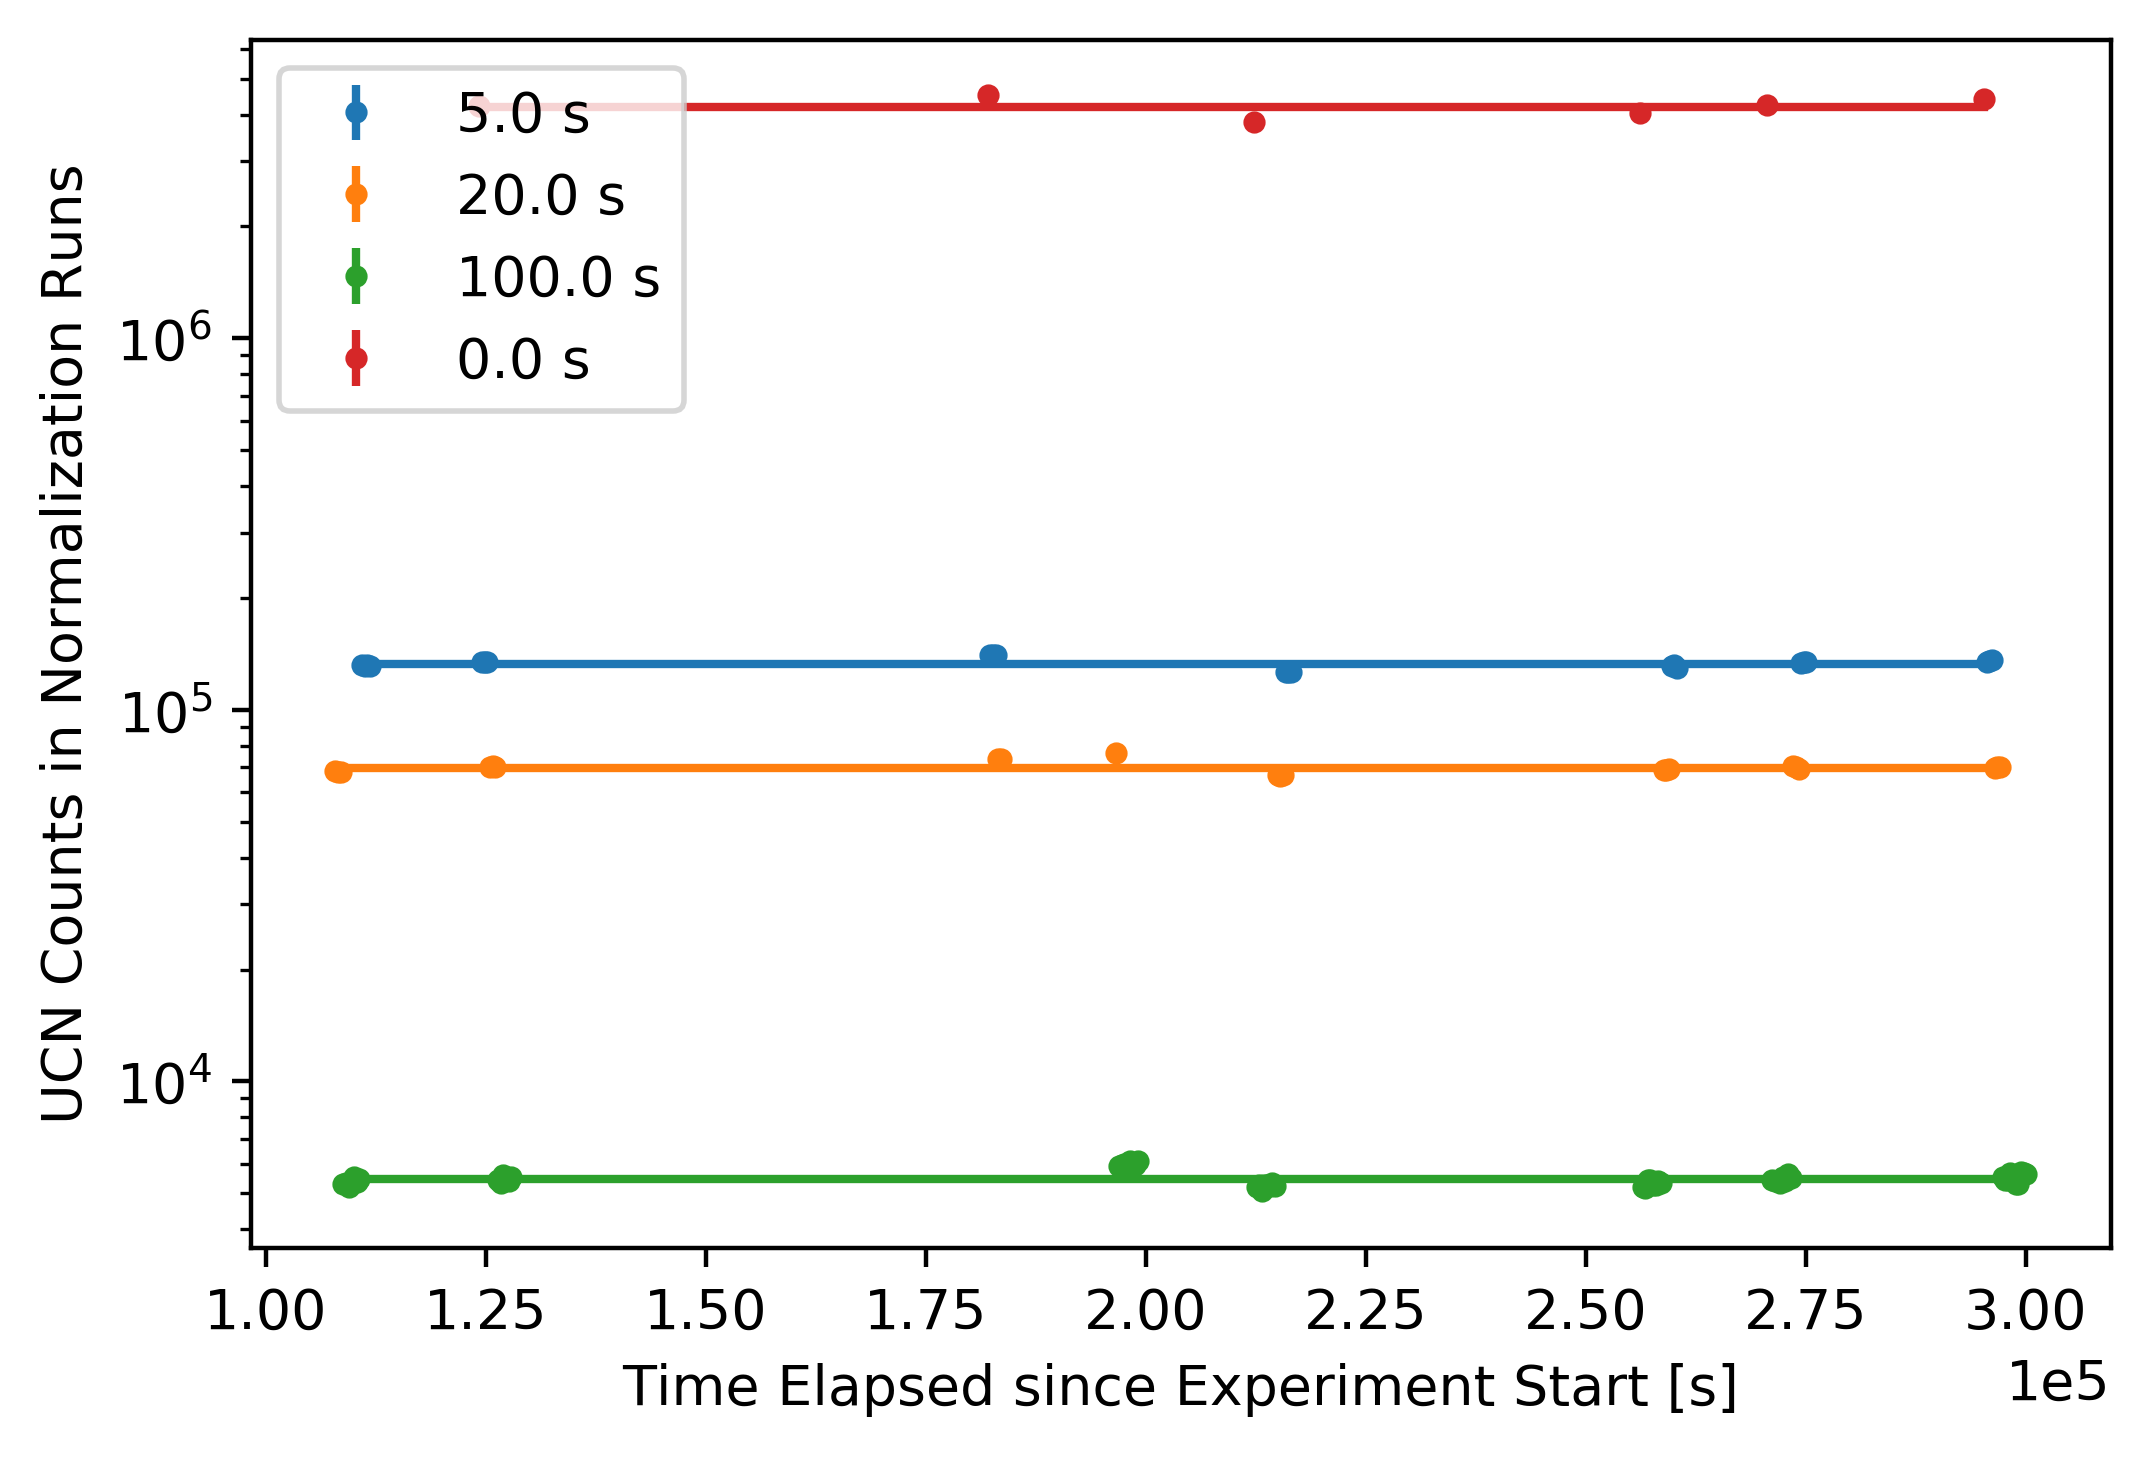

In [6]:
ax = plt.gca()
for arr in norm_data_list:
    color = next(ax._get_lines.prop_cycler)['color']
    plt.errorbar(arr[:,0], arr[:,2], yerr = arr[:,3], fmt = '.', label = '{} s'.format(arr[0,1]), color = color)
    popt, pcov = curve_fit(source_fit, arr[:,0], arr[:,2], p0=[77600, -9], sigma = arr[:,3], absolute_sigma = True)
    plt.plot(arr[:,0], source_fit(arr[:,0], *popt), color = color);

    # printing the fit parameters and their errors:
    fit_parameters = np.zeros(np.shape(pcov))
    for i in range(0, np.size(popt)):
        fit_parameters[i,0] = popt[i]
        fit_parameters[i,1] = np.sqrt(np.diag(pcov))[i]
    print("Fit parameters:\n N_0 = {} +/- {},\n A: {} +/- {}".format(
            fit_parameters[0,0],
            fit_parameters[0,1],
            fit_parameters[1,0],
            fit_parameters[1,1]))
    
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time Elapsed since Experiment Start [s]')
plt.ylabel('UCN Counts in Normalization Runs');
plt.yscale('log')

With this correction in place, we can then treat all the runs which used the same pre-storage time as being equivalent repetitions of the same experiment. This will yield four results, one for each pre-storage time, and these will be used in the transmission calculation:

$$\large{T = \frac{\text{counts with guide}}{\text{nominal counts}}}$$

However, we might be concerned about the quality of the normalization, and the fact that the systematic effects within the source are not being captured well by the simple linear model. In this case, a transmission measurement using the nominal configuration runs that are closest, in time, to the guided runs being examined could be used, instead of this full experiment average. This can be revisited (!!!).

There are five guides to measure:

![](../misc/guides_edgard.png)
![](jonahberean/psi_transmission/misc/guides_edgard.png)

In [43]:
def transmission(guide_data_list, nominal_data_list = nominal_data_list):
    
    # initialize an array to hold the transmission results for each run type
    transmission_results = np.zeros((4,3))

    for i in range(0, 4):
        
        # the storage time is grabbed first
        transmission_results[i,0] = guide_data_list[i][0,1]
        
        # the average of all the relevant runs is calculated, then the ratio between
        # the nominal and the guide results gives the transmission
        guide_average = np.average(guide_data_list[i][:,2])
        nominal_average = np.average(nominal_data_list[i][:,2])
        transmission_results[i,1] = guide_average / nominal_average
        
        # compute fractional uncertainty for each, here we are averaging data so 
        # the standard error in the mean is computed
        guide_error      = np.std(guide_data_list[i][:,2]) / np.sqrt(np.shape(guide_data_list[i][:,2])[0])
        guide_frac_error = guide_error / guide_average
        nominal_error    = np.std(nominal_data_list[i][:,2]) / np.sqrt(np.shape(nominal_data_list[i][:,2])[0])
        nominal_frac_error   = nominal_error / nominal_average
        
        # error on transmission is propagated by summing the fractional uncertainties in 
        # quadrature
        transmission_frac_error = np.sqrt(guide_frac_error**2 + nominal_frac_error**2)
        transmission_results[i,2] = transmission_results[i,1] * transmission_frac_error   
        
    plt.errorbar(transmission_results[:,0], transmission_results[:,1], yerr = transmission_results[:,2], fmt = '.');
    plt.ylabel('Transmission Ratio');
    plt.xlabel('Storage time [s]');
    return transmission_results

## Results

Guide                        | Storage Time  | Transmission | Uncertainty |
---                          |     ---       |              |             |
      UGD01                  |  direct       |              |             |
      UGD01                  |  direct       |              |             |      
      UGD03                  |  direct       |              |             |  
      EPSUS                  |  direct       |              |             | 
      JPSUS                  |  direct       |              |             |  
      JPTi                   |  direct       |              |             | 

## UGD01

array([[5.00000000e+00, 9.32260106e-01, 6.04524085e-03],
       [2.00000000e+01, 9.37167984e-01, 7.44165743e-03],
       [1.00000000e+02, 9.36262719e-01, 6.19314183e-03],
       [0.00000000e+00, 8.65785432e-01, 1.91913608e-02]])

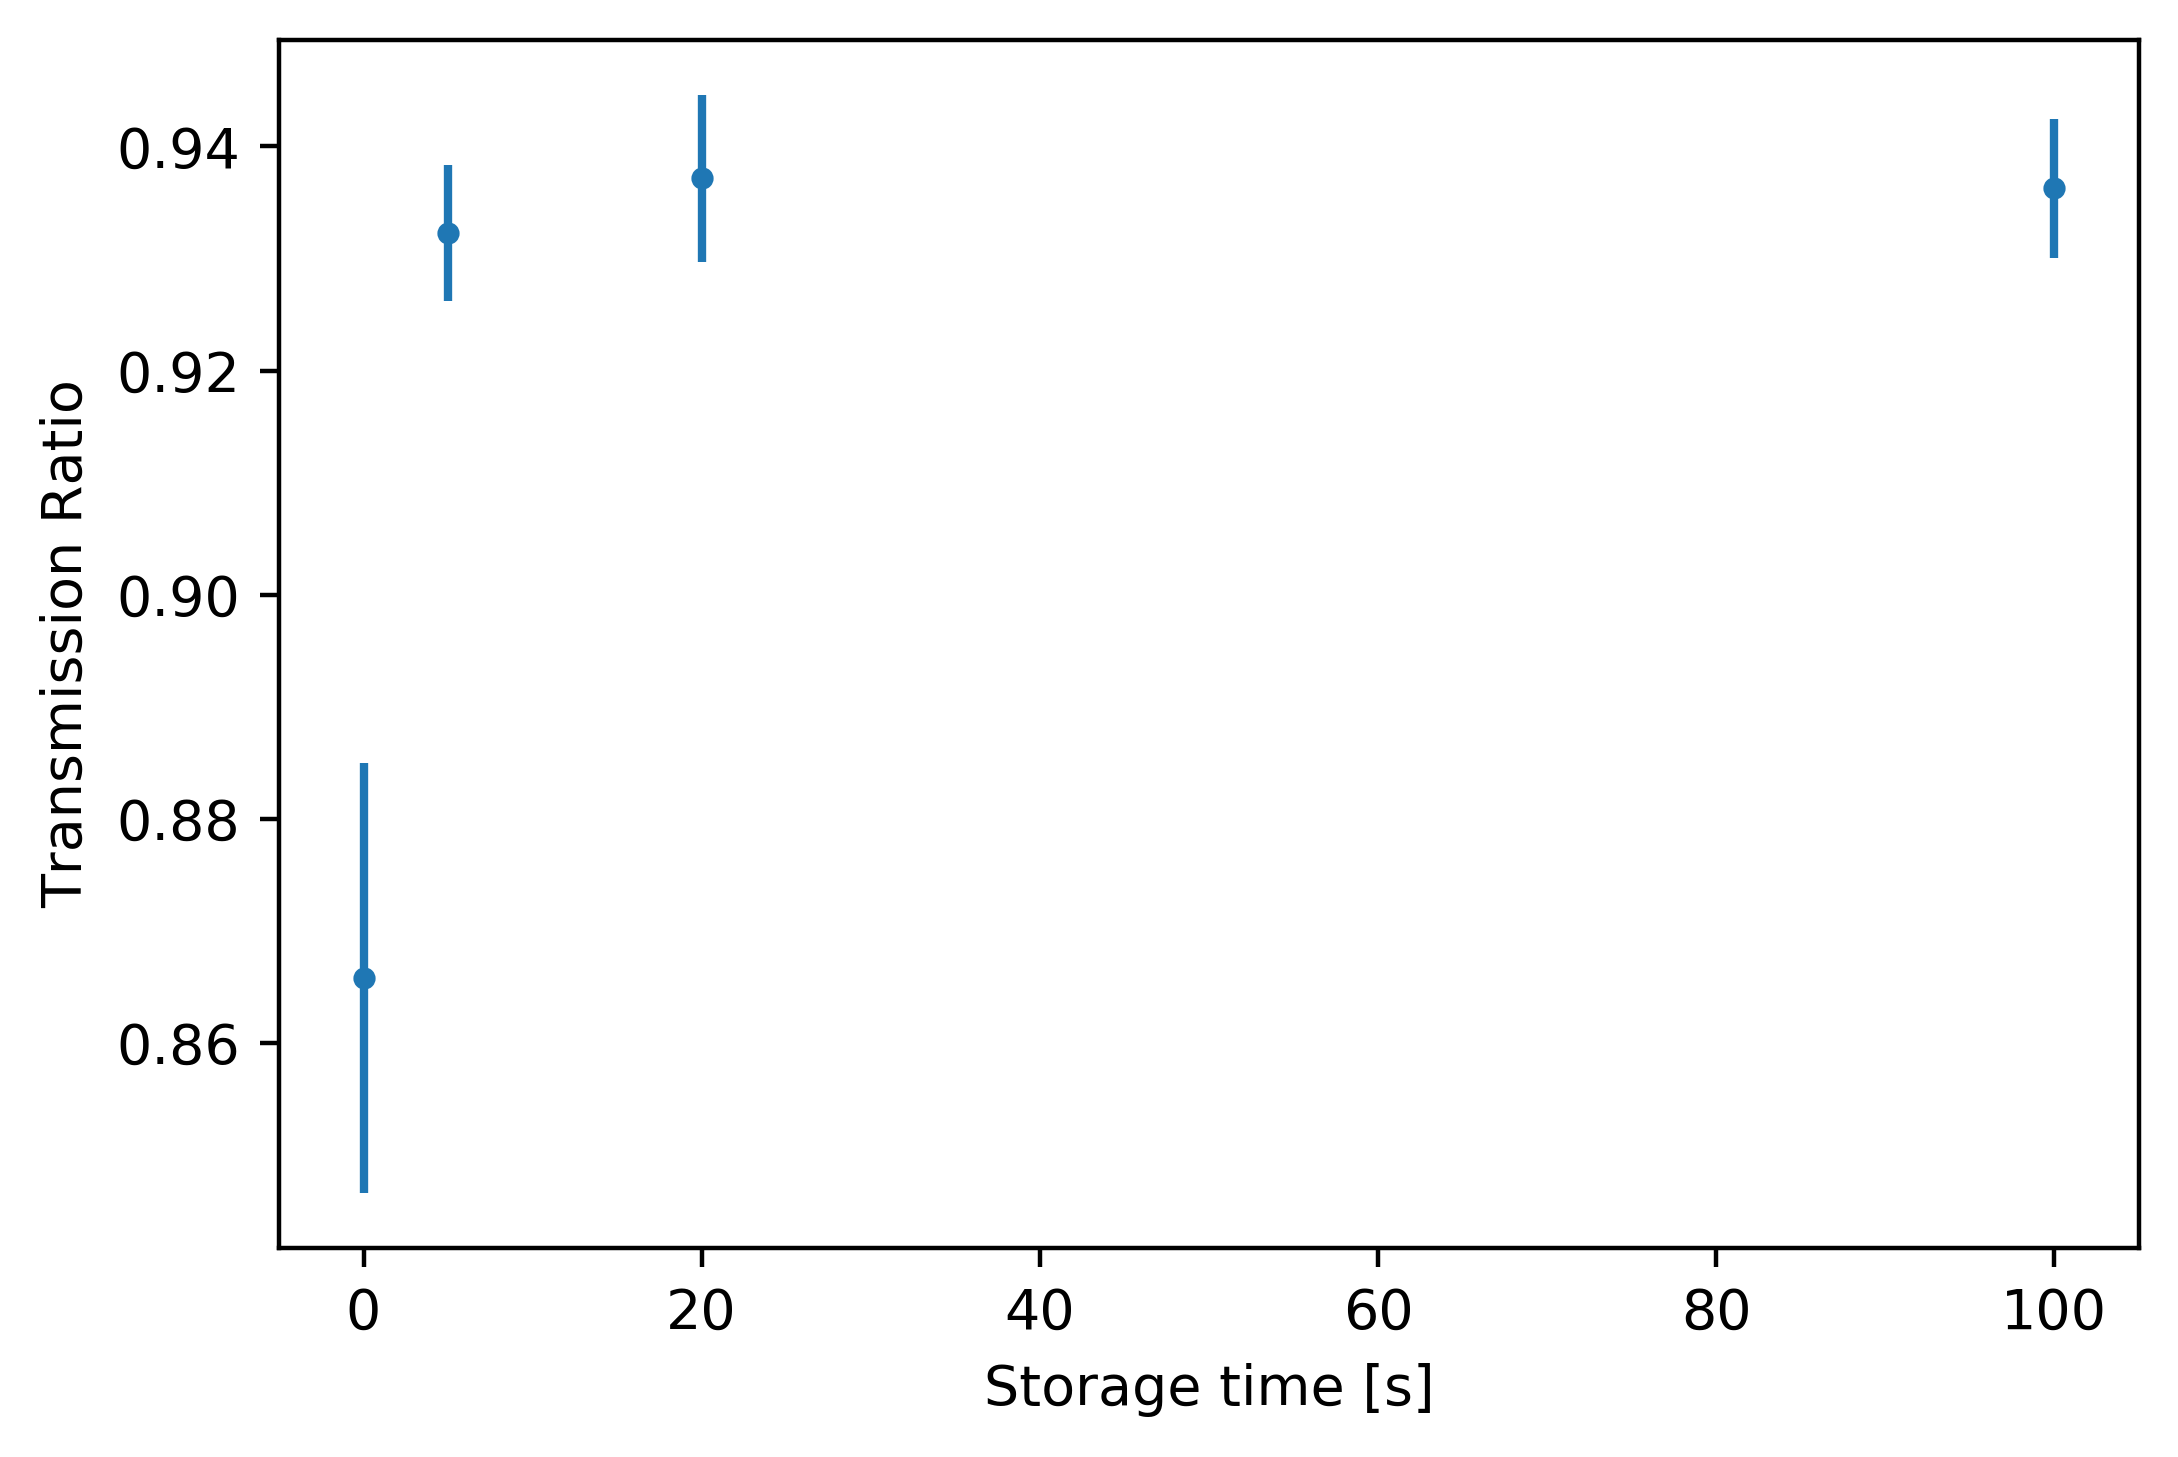

In [49]:
gd01_transmission_results = transmission(gd01_data_list)
gd01_transmission_results

## UGD03

array([[5.00000000e+00, 9.34885864e-01, 6.01540151e-03],
       [2.00000000e+01, 9.37212833e-01, 6.96427519e-03],
       [1.00000000e+02, 9.31858408e-01, 9.26821824e-03],
       [0.00000000e+00, 9.07540942e-01, 2.01169309e-02]])

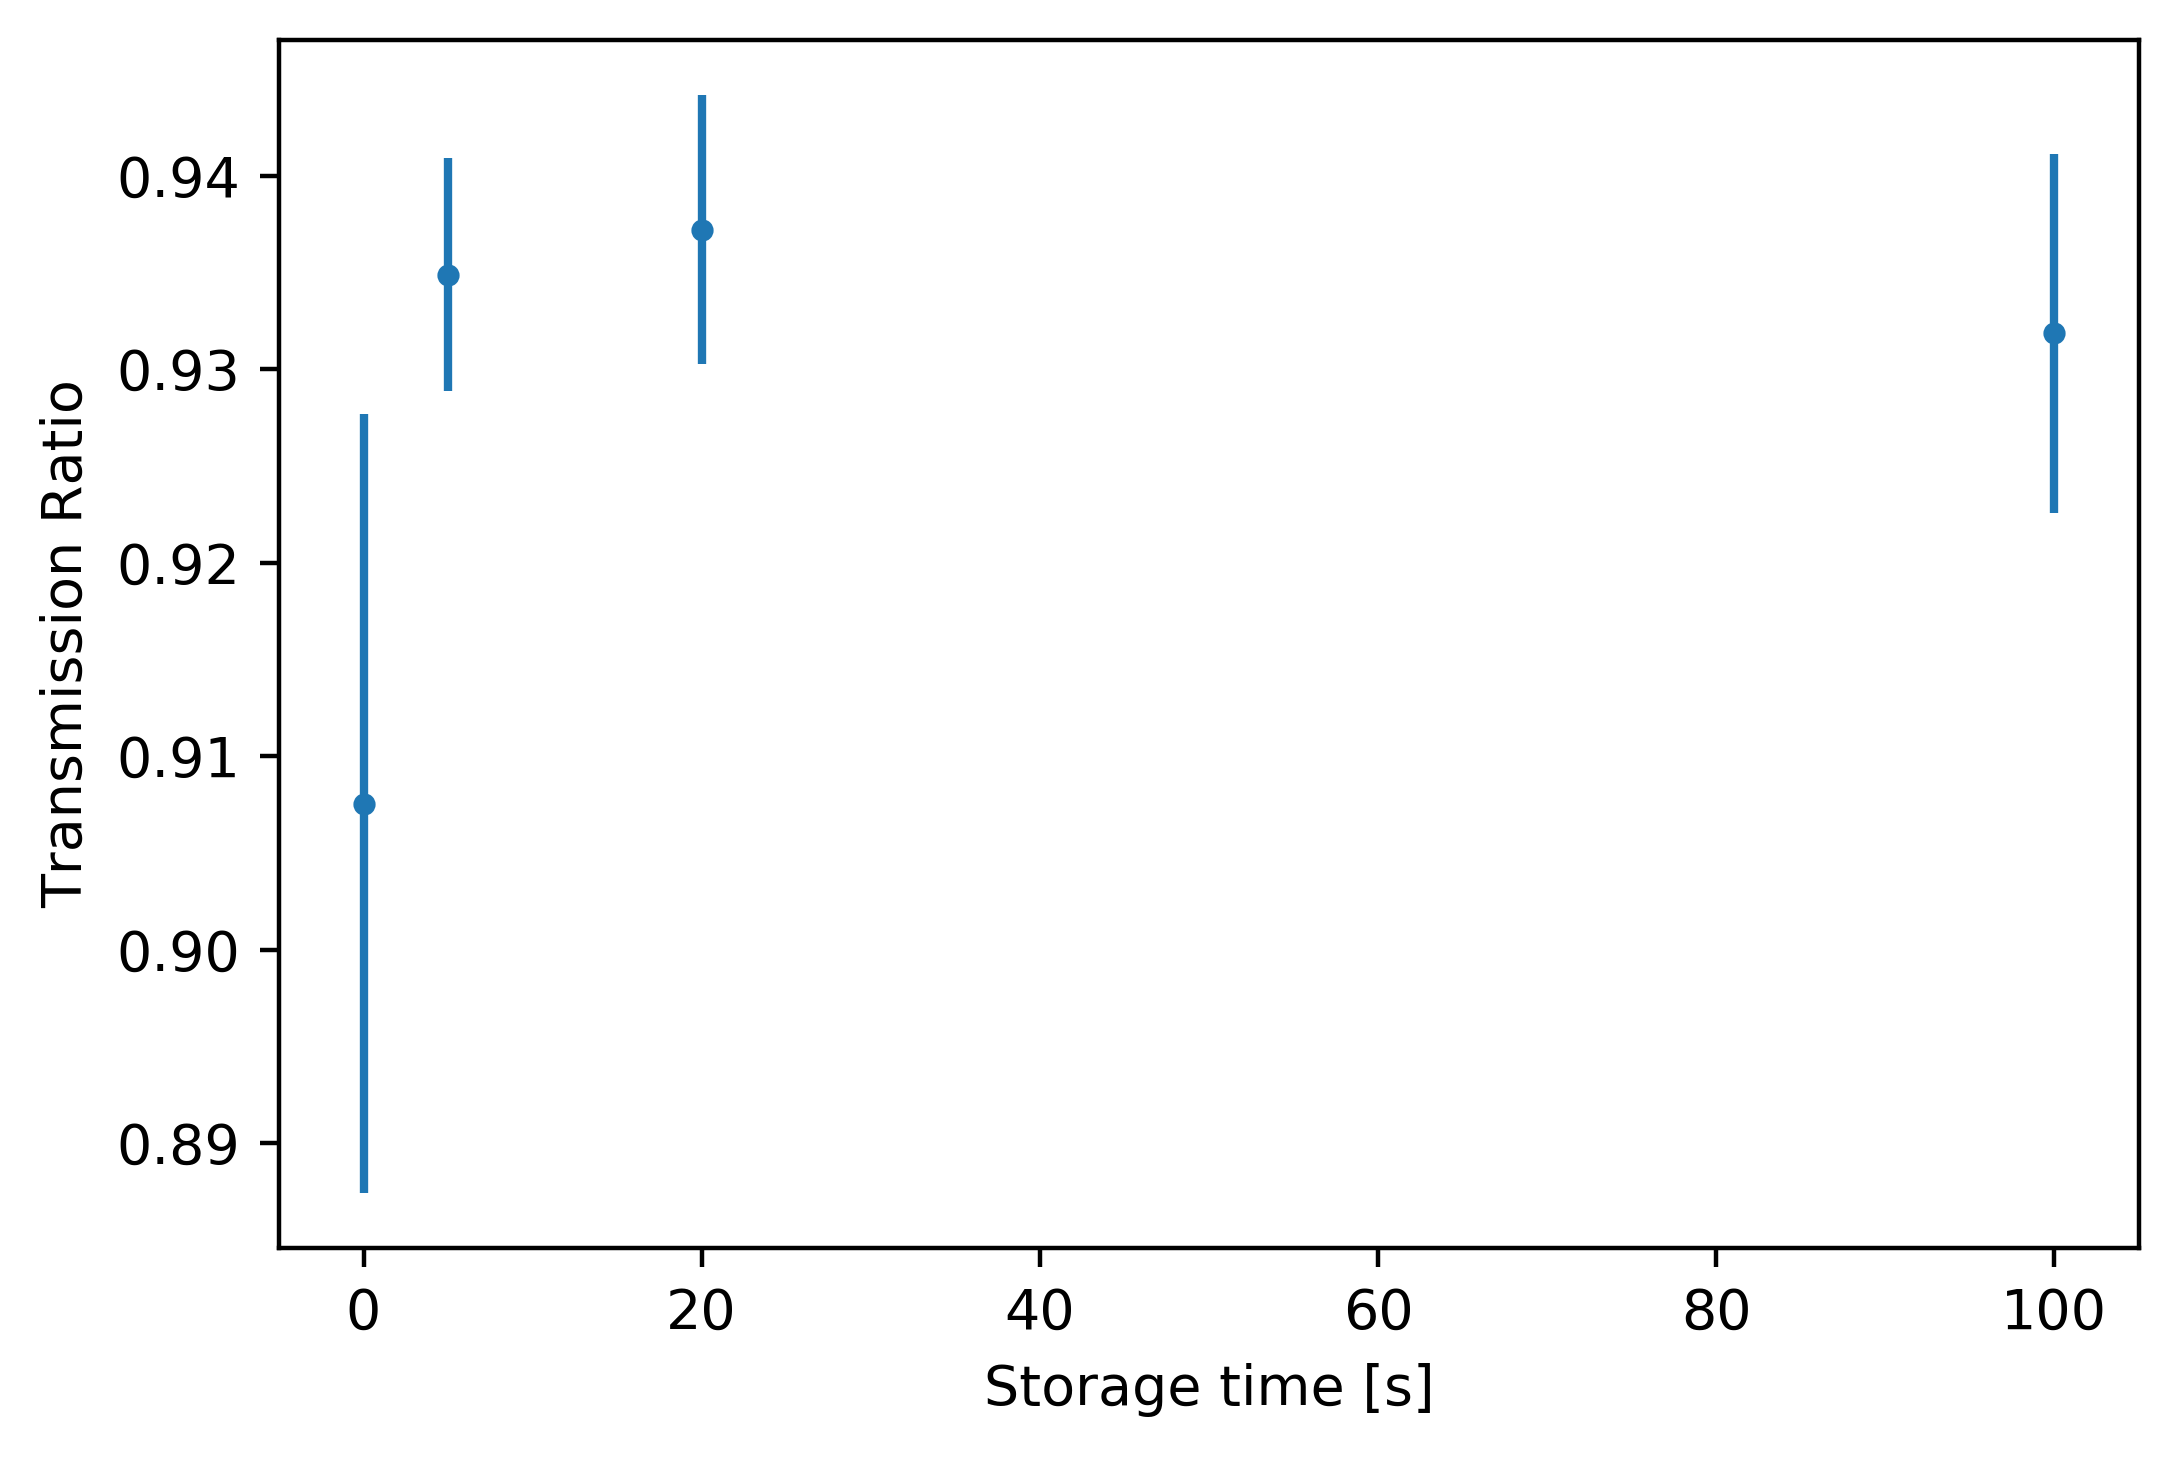

In [50]:
gd03_transmission_results = transmission(gd03_data_list)
gd03_transmission_results

## EP SUS with NiP

array([[5.00000000e+00, 9.71850157e-01, 6.03609418e-03],
       [2.00000000e+01, 9.67754935e-01, 7.14646445e-03],
       [1.00000000e+02, 9.53894037e-01, 6.91678043e-03],
       [0.00000000e+00, 9.82917158e-01, 2.24980031e-02]])

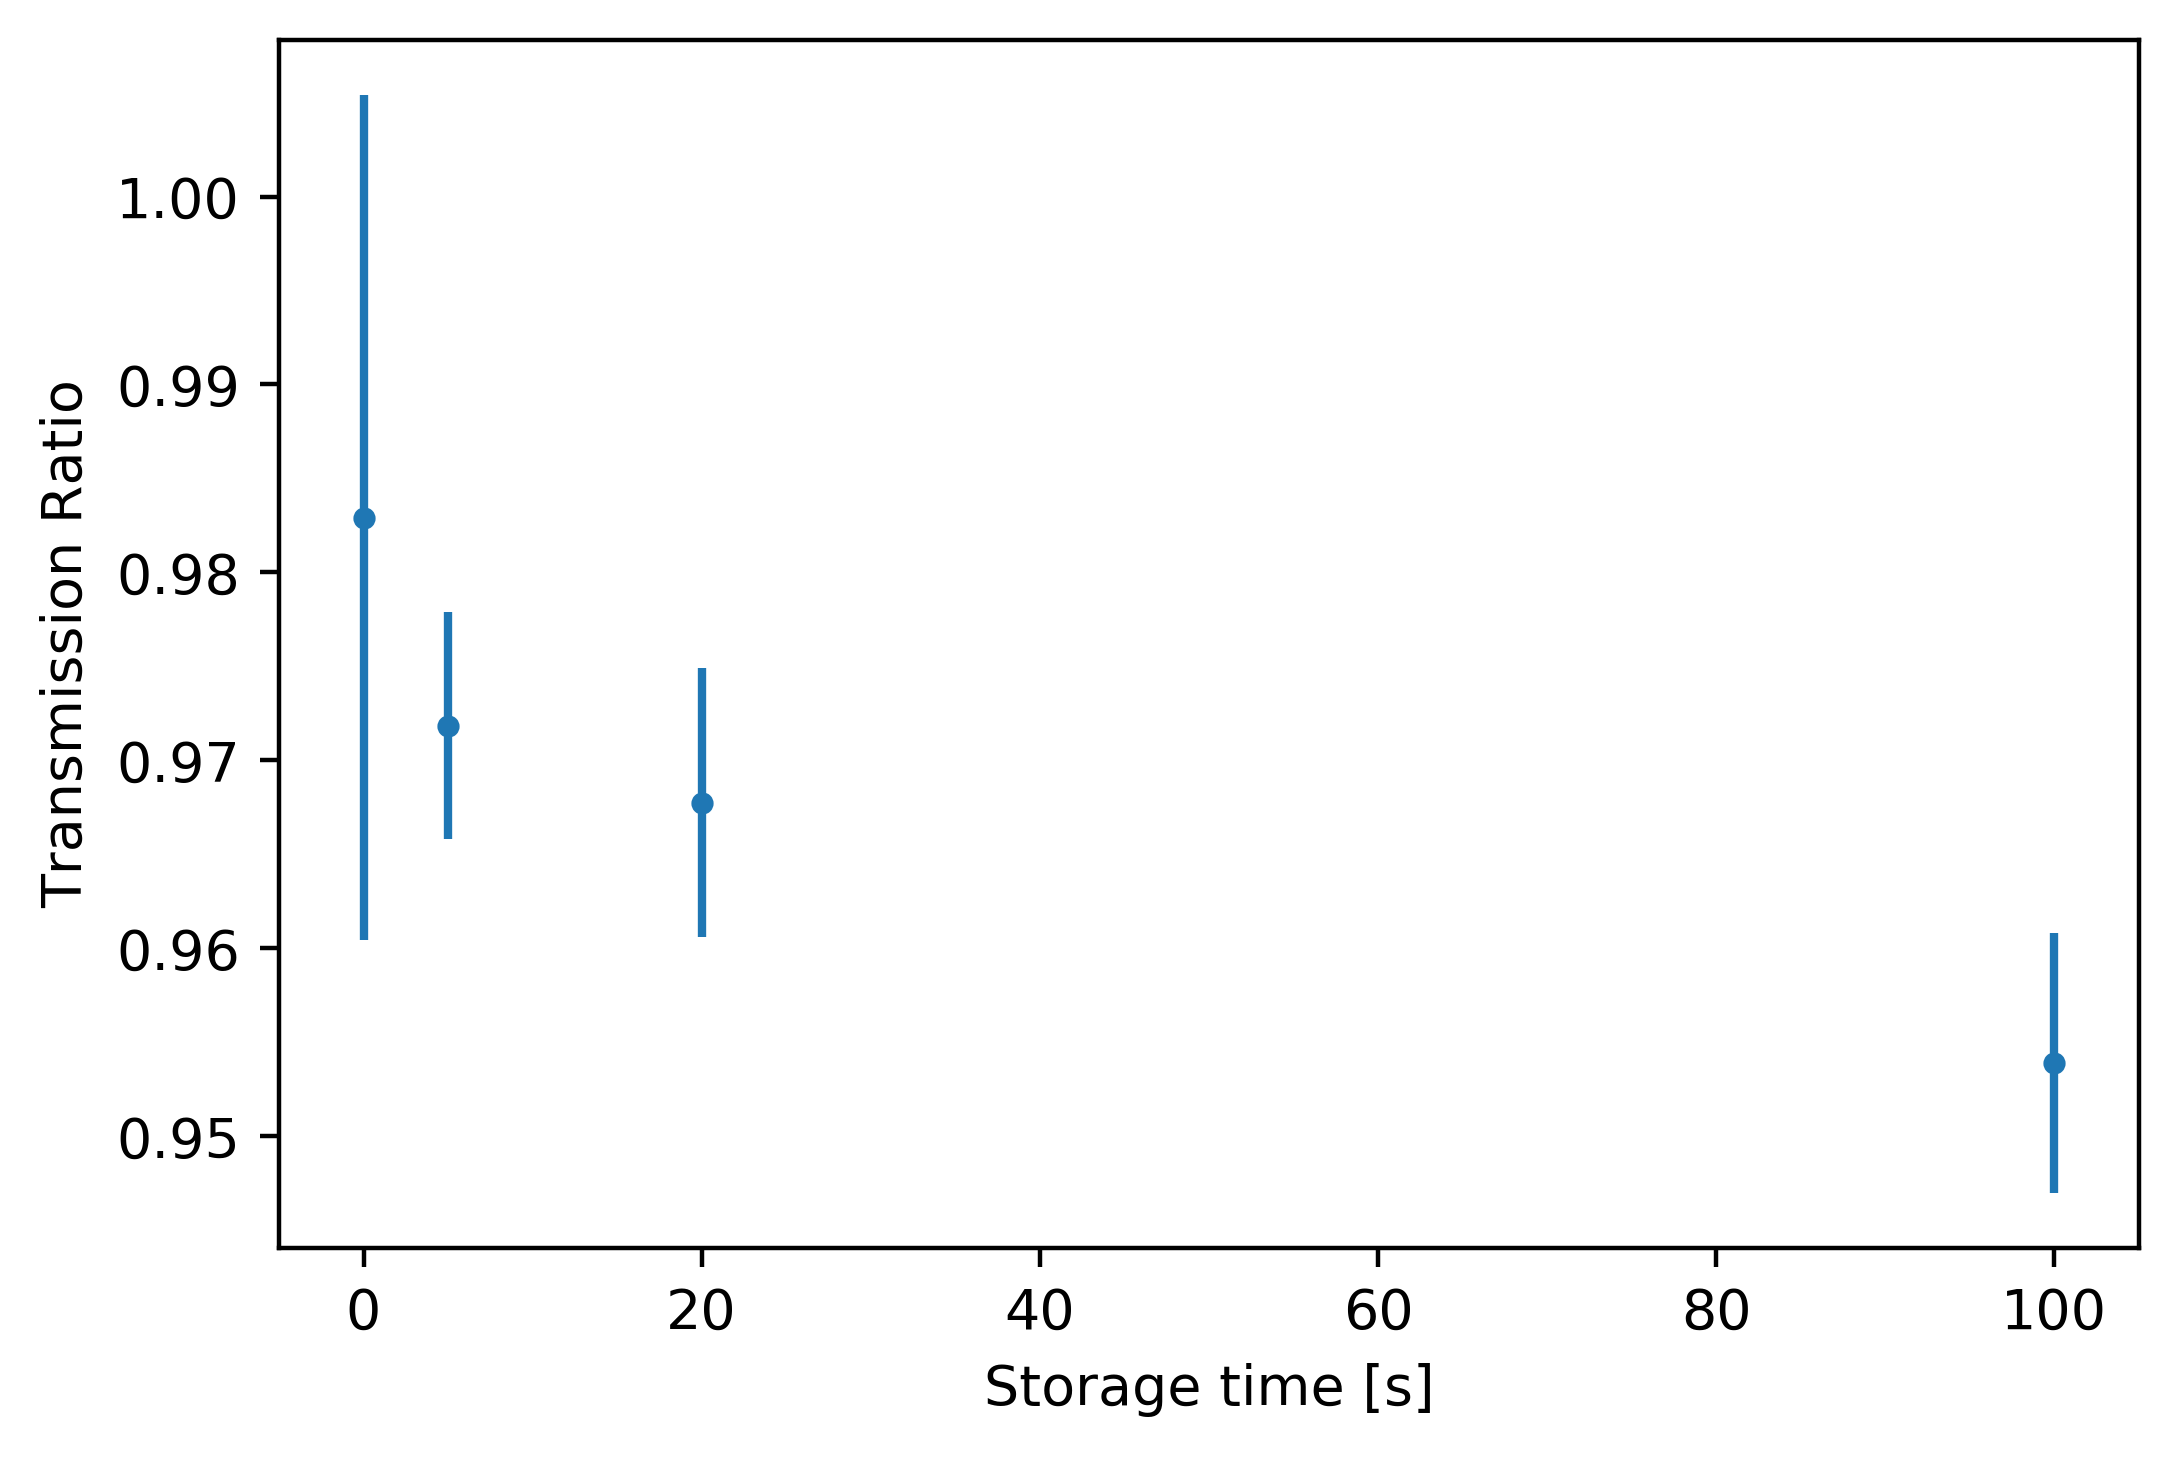

In [51]:
epsu_transmission_results = transmission(epsu_data_list)
epsu_transmission_results

## JP SUS with NiP

array([[5.00000000e+00, 7.10000305e-01, 4.73621901e-03],
       [2.00000000e+01, 7.20947177e-01, 5.61361321e-03],
       [1.00000000e+02, 7.04639127e-01, 7.08943382e-03],
       [0.00000000e+00, 6.16956572e-01, 1.36757166e-02]])

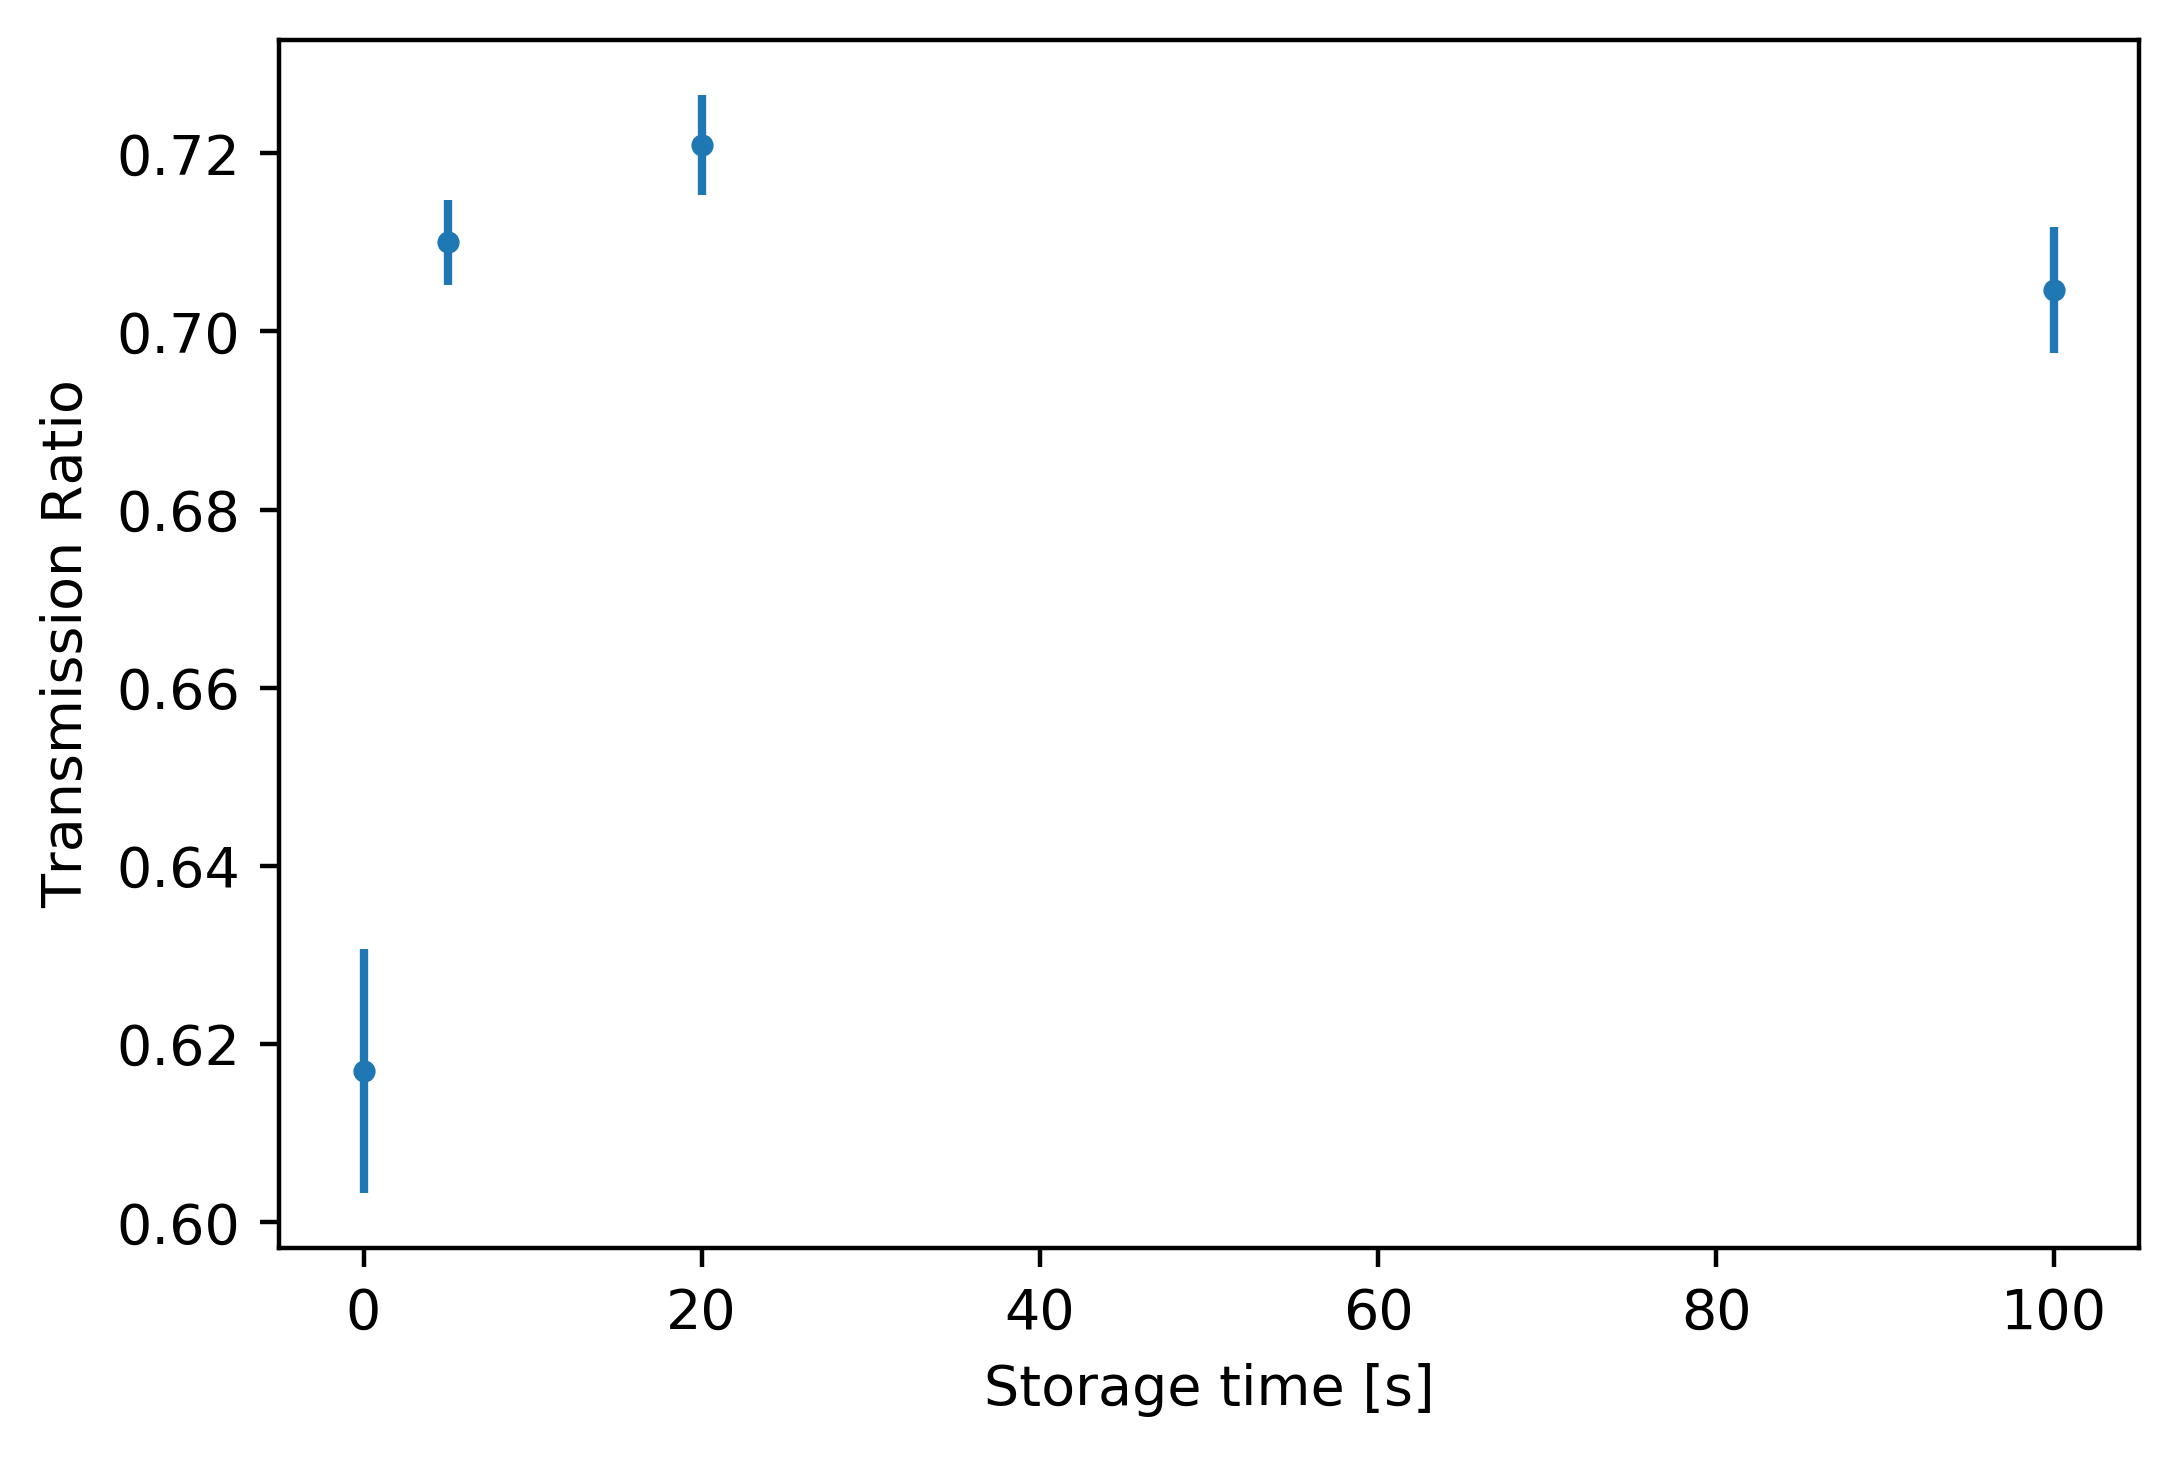

In [52]:
jpsu_transmission_results = transmission(jpsu_data_list)
jpsu_transmission_results

## JP Ti with NiP

array([[5.00000000e+00, 5.36717946e-01, 3.38364027e-03],
       [2.00000000e+01, 5.52730220e-01, 4.35045185e-03],
       [1.00000000e+02, 5.54911004e-01, 3.69640942e-03],
       [0.00000000e+00, 3.97040887e-01, 8.80097383e-03]])

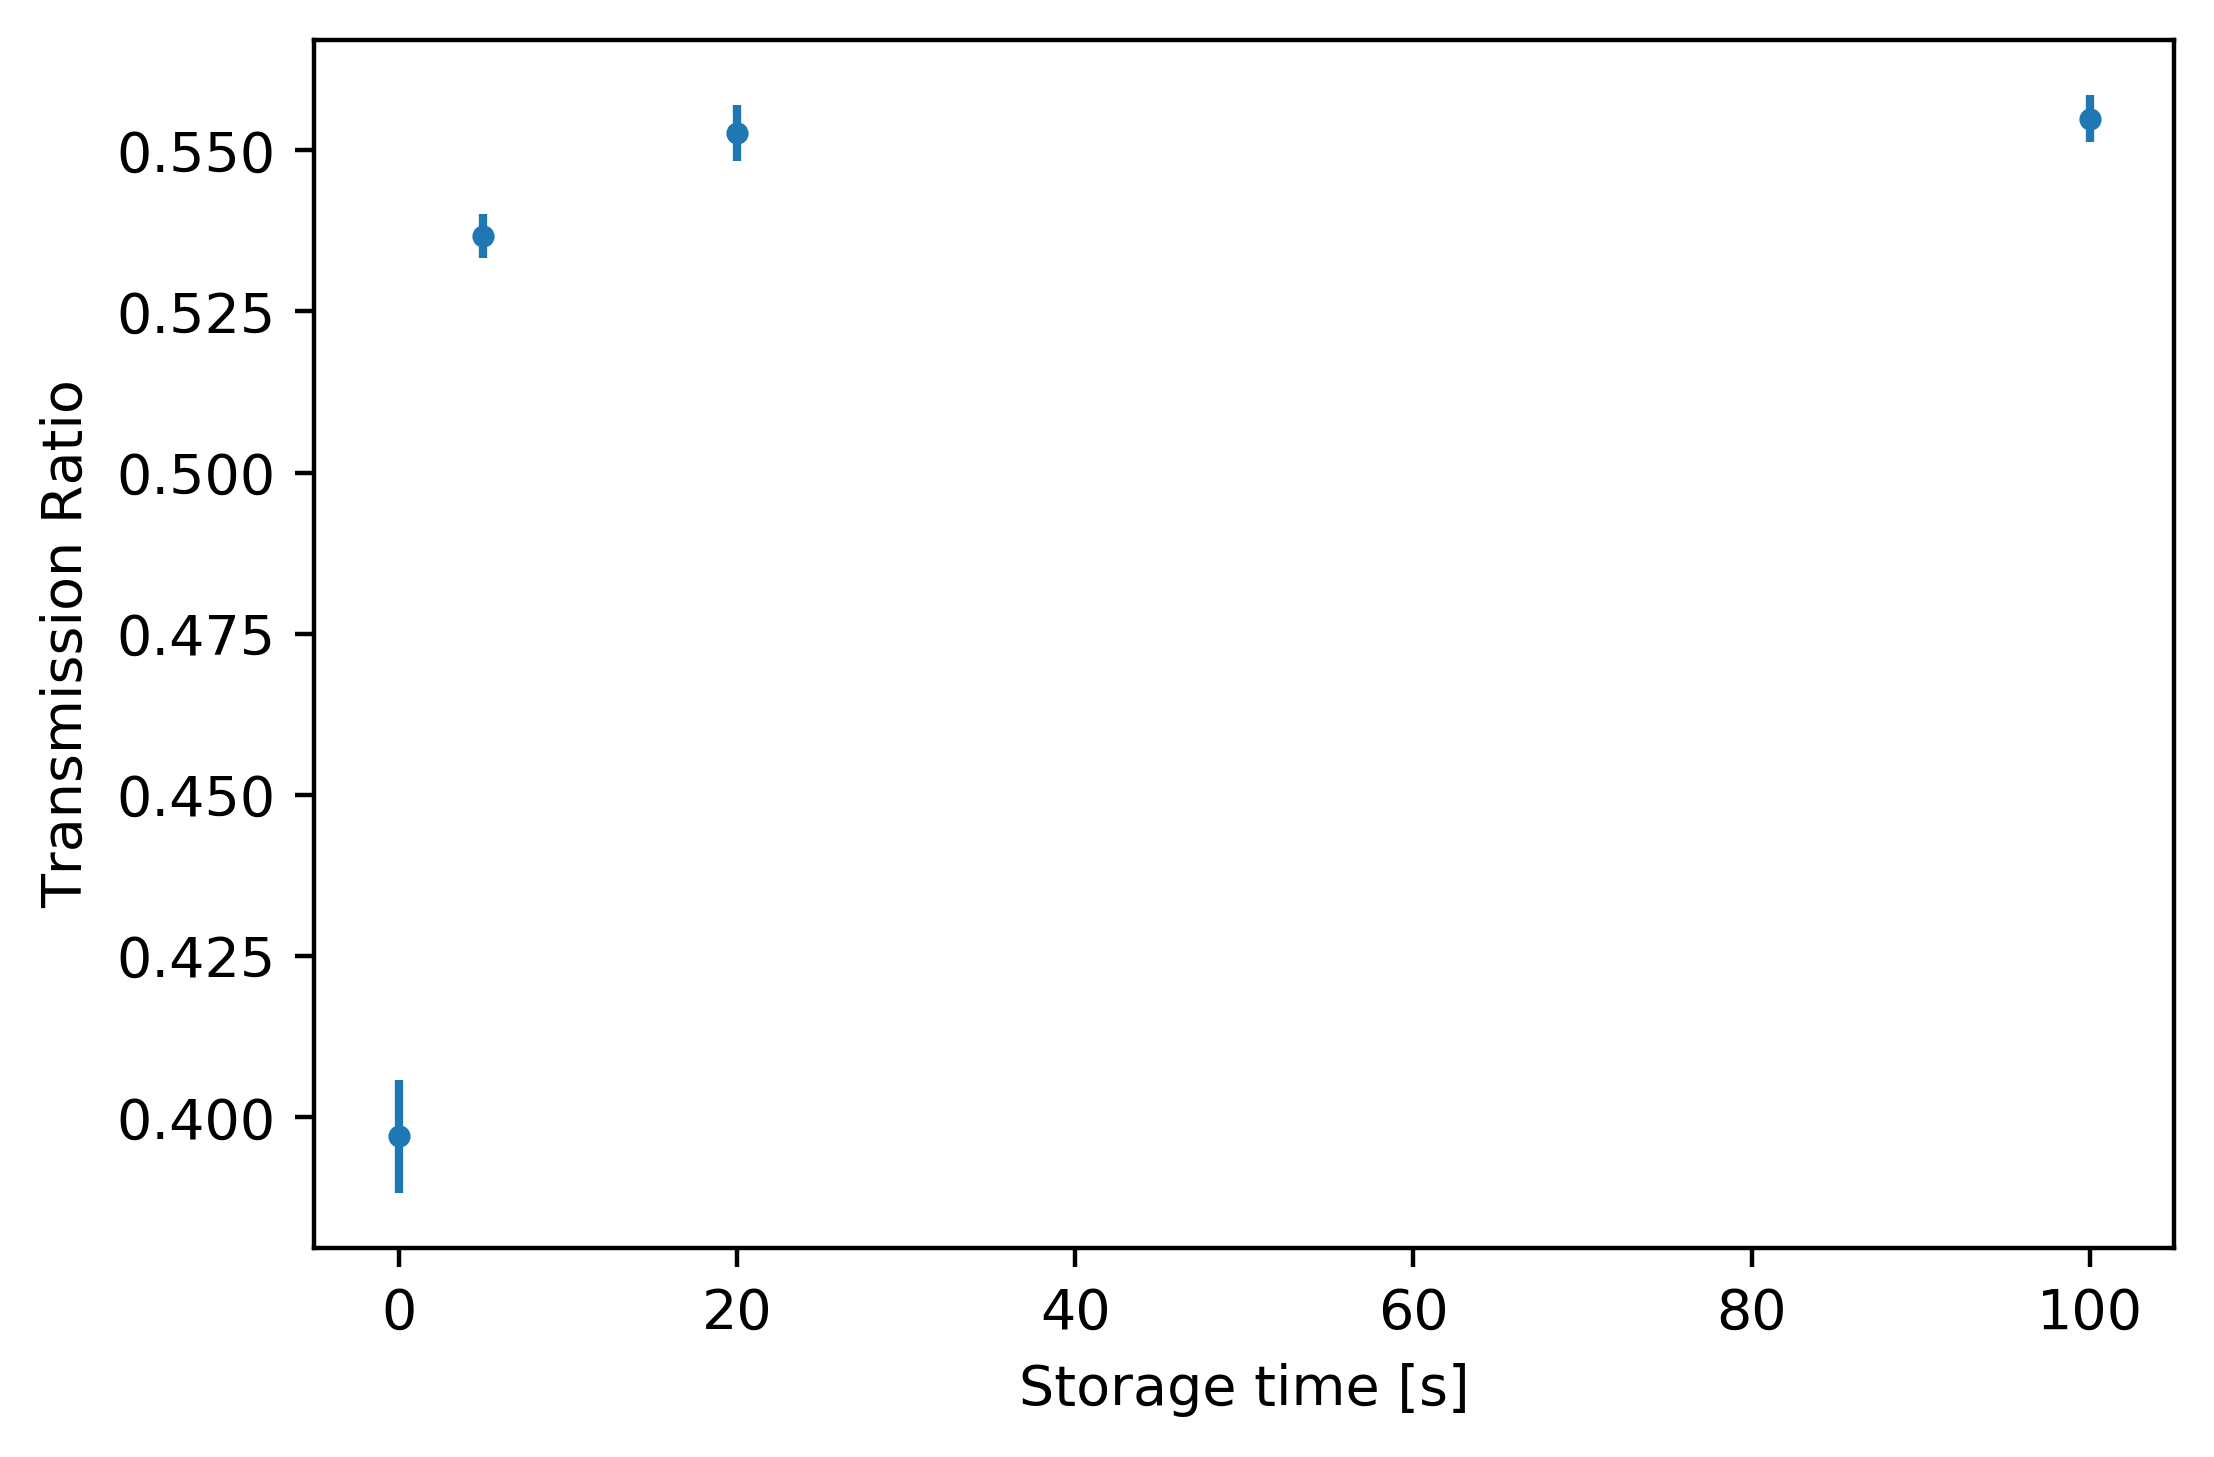

In [53]:
jpti_transmission_results = transmission(jpti_data_list)
jpti_transmission_results